In [1]:
import numpy as np
import json
import os
import pandas as pd
import seaborn as sns
from time import strptime
from matplotlib import pyplot as plt
import matplotlib
import random
import pickle

In [2]:
month_map = {"January": '01', "Jan":'01', "February":'02', "Feb":'02', "March":'03', 'Mar': '03', "April":'04', "Apr":'04', \
             "May":'05', "June":'06', "Jun":'06', "July":'07', "Jul":'07', "August":'08', "Aug":'08', \
                 "September":'09', "Sep":'09', "October": '10', "Oct":'10', "November": '11', "Nov":'11', "December":'12', "Dec":'12'}

In [3]:
file_dir = "./TripAdvisor"

In [4]:
data_list = []
columns = ['rating', 'userid', 'itemid', 'date', 'reviewid']
entries = os.listdir(file_dir)

entry_index = 0

for entry in entries:
    file_name = os.path.join(file_dir, entry)
    entry_f = open(file_name, "r")
    review = json.loads(entry_f.read())
    reviews_users = review['Reviews']
    reviews_users_num_ = len(reviews_users)
    
    if entry_index % 1000 == 0:
        print("reviews_users_num_", reviews_users_num_)
    
    reviews_hotel = review['HotelInfo']
    hotel_id = reviews_hotel['HotelID'] 
    
    for review_user_index in range(reviews_users_num_):
        review_user = reviews_users[review_user_index]
        overall_rating = review_user['Ratings']['Overall']
        review_id = review_user['ReviewID']
        review_date = review_user['Date']
        split_review_date = review_date.split(",")
        split_split_review_date = split_review_date[0].split(" ")
        month = split_split_review_date[0]
        day = split_split_review_date[1]
        year = split_review_date[1]
#         print(month)
        month = str(month_map[month])
        
        if len(day) == 1:
            day = "0"+day
        
        date = year+"-"+month+"-"+day
#         print("date", date)
        
        review_user_id = review_user['Author']
        
        sample = [overall_rating, review_user_id, hotel_id, date, review_id]
        
        data_list.append(sample)
        entry_index += 1
#         if entry_index == 1:
#             break
        
    entry_f.close()
        
    if entry_index % 10000 == 0:
        print(entry_index)

reviews_users_num_ 97
reviews_users_num_ 420
reviews_users_num_ 543
reviews_users_num_ 20
reviews_users_num_ 155
reviews_users_num_ 65
reviews_users_num_ 11
reviews_users_num_ 305
830000
reviews_users_num_ 1782
reviews_users_num_ 37
reviews_users_num_ 24
reviews_users_num_ 399
reviews_users_num_ 360


In [5]:
print(entry_index)

1621956


In [10]:
trip_data = pd.DataFrame(data_list, columns=columns)

In [11]:
print(trip_data.userid.nunique(), trip_data.itemid.nunique())

781403 12746


In [ ]:
trip_data_file = "trip_advisor.pickle"

trip_data.to_pickle(trip_data_file)

In [16]:
unique_item_list = pd.unique(trip_data['itemid'])
unique_user_list = pd.unique(trip_data['userid'])
print('unique user num', len(unique_item_list))
print("unique item num", len(unique_item_list))

unique user num 12746
unique item num 12746


In [17]:
user2id_map = dict((username, uid) for (uid, username) in enumerate(unique_user_list))
item2id_map = dict((itemname, iid) for (iid, itemname) in enumerate(unique_item_list))

In [18]:
trip_data['userid'] = trip_data['userid'].apply(lambda x: user2id_map[x])

In [31]:
test_data = {'dd':1, "cc":2}
for i in test_data:
    print(i)

dd
cc


In [19]:
trip_data

,rating,userid,itemid,date,reviewid
0,4.0,0,184317,2012-04-18,UR128145839
1,5.0,1,184317,2012-04-16,UR127996098
2,5.0,2,184317,2012-04-15,UR127897812
3,5.0,3,184317,2012-04-06,UR127356066
4,3.0,4,184317,2012-02-20,UR124928335
5,5.0,5,184317,2012-02-06,UR124206231
6,3.0,6,184317,2012-01-30,UR123865747
7,4.0,7,184317,2012-01-27,UR123704230
8,4.0,8,184317,2012-01-02,UR122435776
9,4.0,9,184317,2012-01-01,UR122370040


In [13]:
trip_data.sort_values(by=['date'])

,rating,userid,itemid,date,reviewid
327193,4,lass=,112289,2001-04-13,UR710978458
249687,2,lass=,81169,2001-08-07,UR836224888
1356787,4,lass=,89050,2001-08-11,UR748336653
536890,4,lass=,86978,2001-09-10,UR799620065
1356786,3,lass=,89050,2001-11-28,UR944747395
174227,5.0,A TripAdvisor Member,112002,2001-12-03,UR334376
716139,4,lass=,86959,2001-12-05,UR659074919
1476330,5,lass=,81531,2001-12-21,UR752490502
1524087,5,lass=,89115,2001-12-28,UR386804423
536889,5,lass=,86978,2002-01-01,UR414646572


In [9]:
sorted_trip_data = trip_data.sort_values(by=['date'])

In [113]:
a = [1, 2, 3]
random.shuffle(a)
print(a)

[2, 1, 3]


### visualizing the time delta over time

len cumsum 313 313 313


/zf15/rc7ne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/zf15/rc7ne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


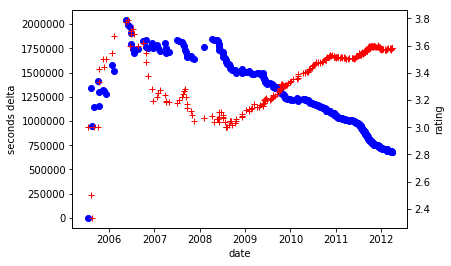

len cumsum 10 10 10


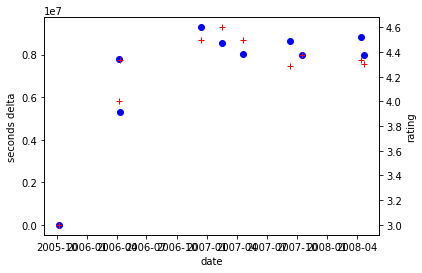

len cumsum 149 149 149


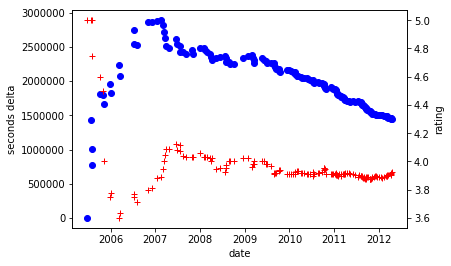

len cumsum 51 51 51


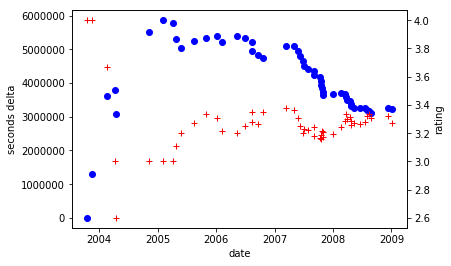

len cumsum 23 23 23


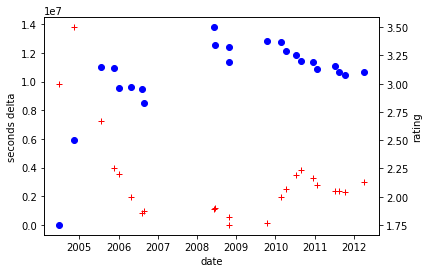

len cumsum 82 82 82


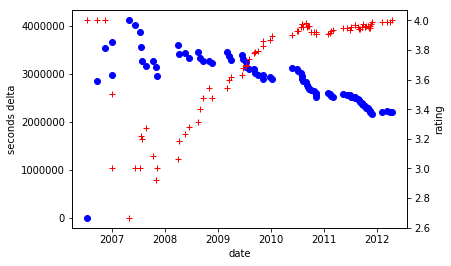

len cumsum 1 1 1


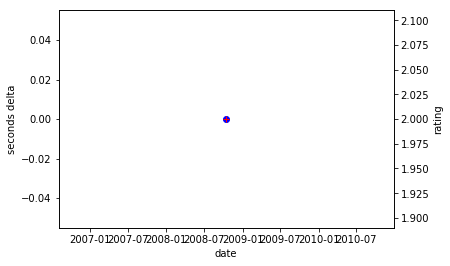

len cumsum 47 47 47


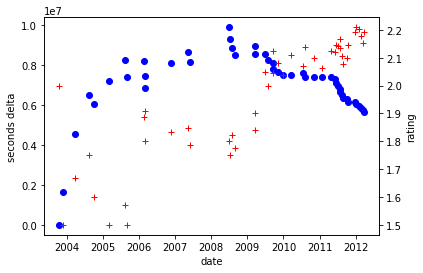

len cumsum 8 8 8


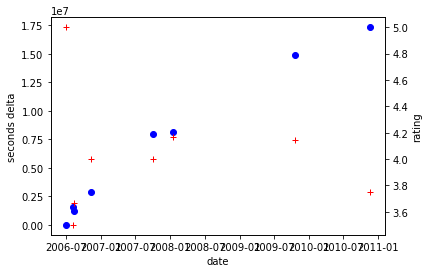

len cumsum 89 89 89


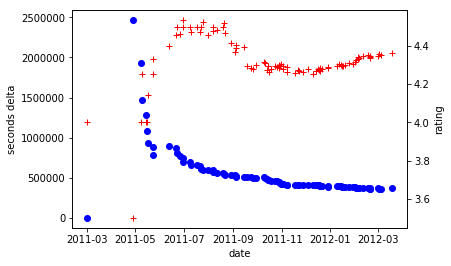

len cumsum 27 27 27


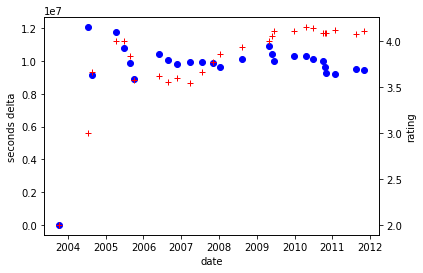

len cumsum 67 67 67


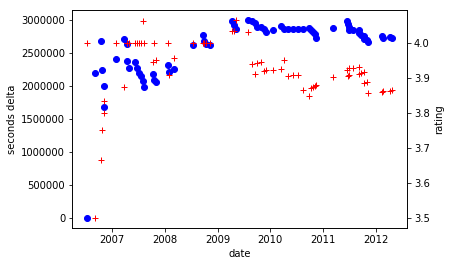

len cumsum 28 28 28


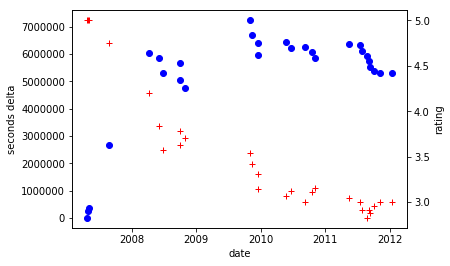

len cumsum 30 30 30


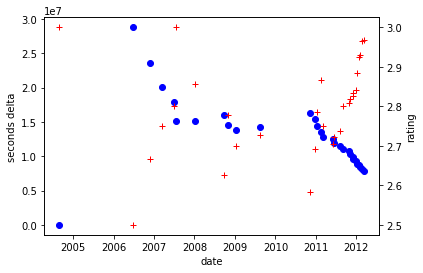

len cumsum 317 317 317


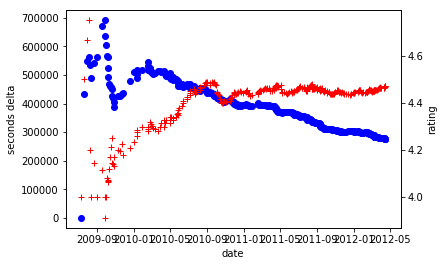

len cumsum 21 21 21


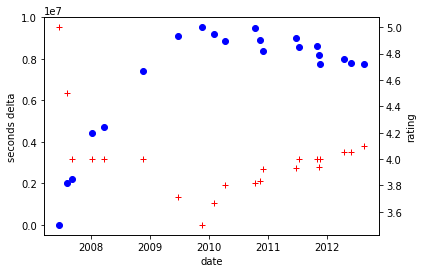

len cumsum 108 108 108


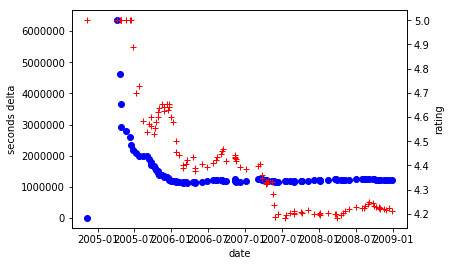

len cumsum 7 7 7


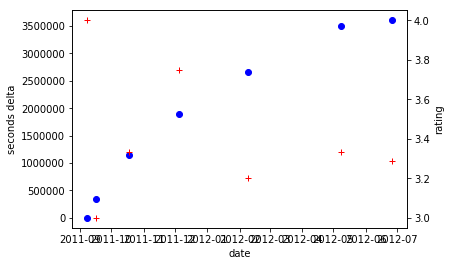

len cumsum 35 35 35


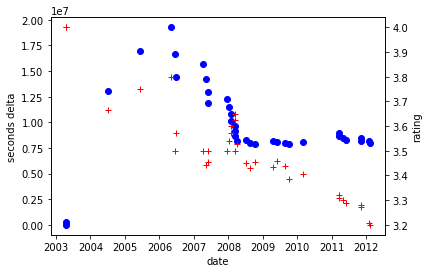

len cumsum 52 52 52


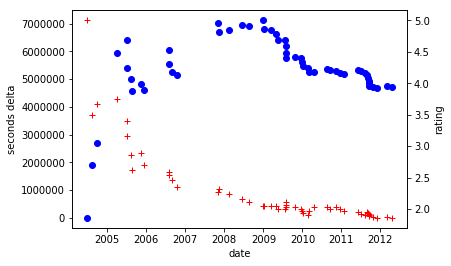

len cumsum 57 57 57


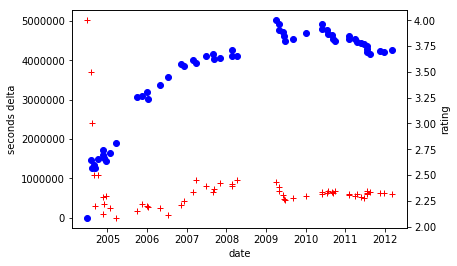

len cumsum 2 2 2


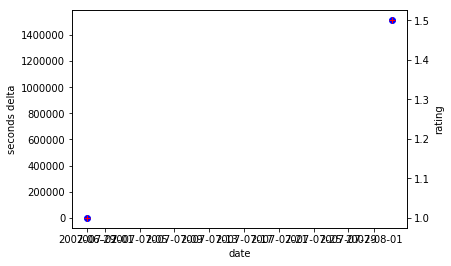

len cumsum 65 65 65


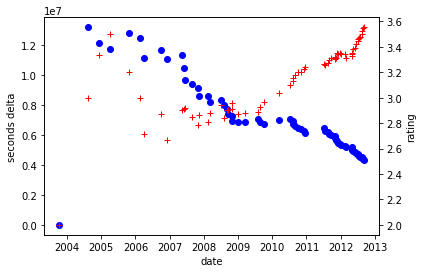

len cumsum 8 8 8


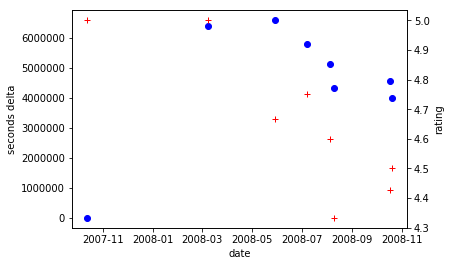

len cumsum 7 7 7


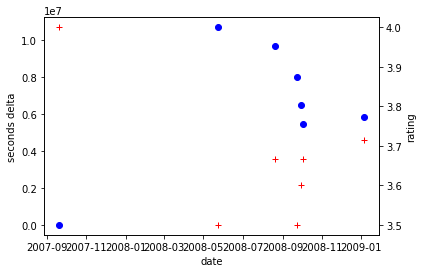

len cumsum 15 15 15


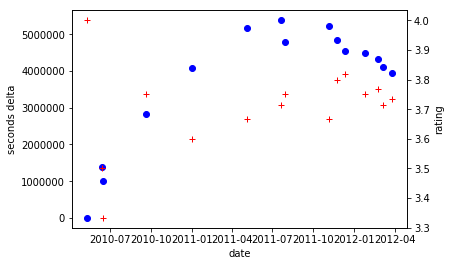

len cumsum 8 8 8


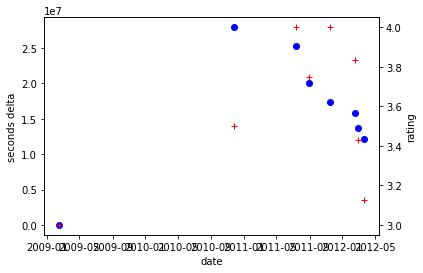

len cumsum 325 325 325


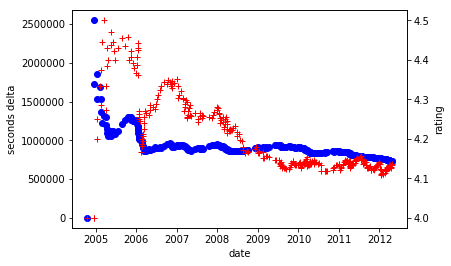

len cumsum 128 128 128


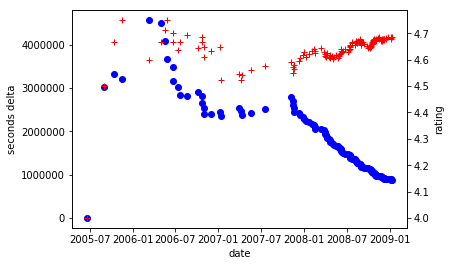

len cumsum 101 101 101


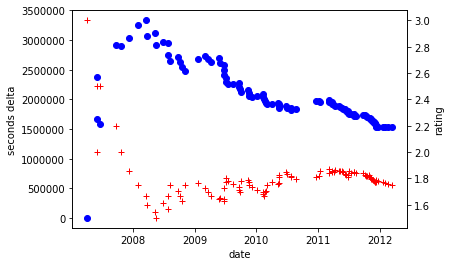

len cumsum 8 8 8


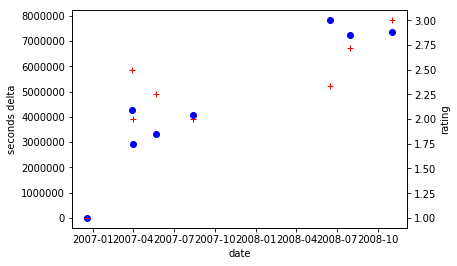

len cumsum 37 37 37


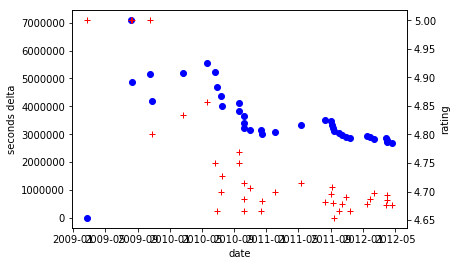

len cumsum 70 70 70


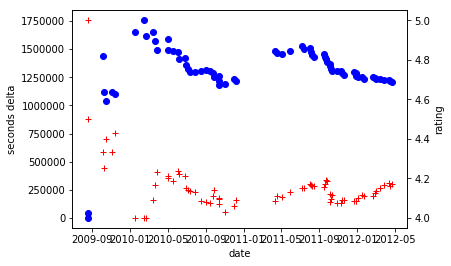

len cumsum 7 7 7


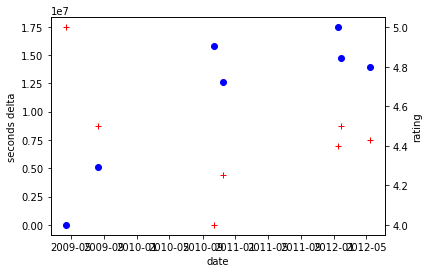

len cumsum 1472 1472 1472


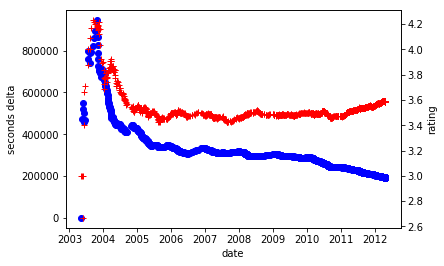

len cumsum 441 441 441


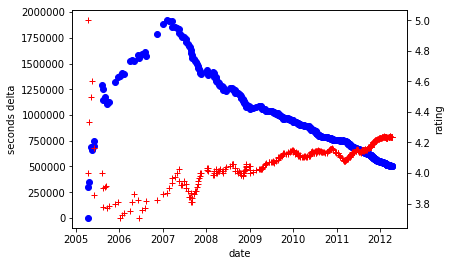

len cumsum 74 74 74


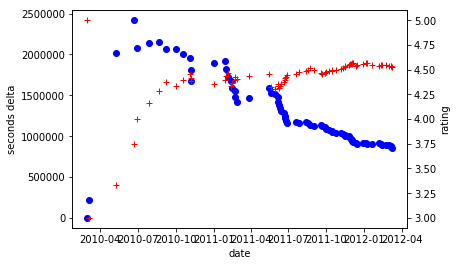

len cumsum 44 44 44


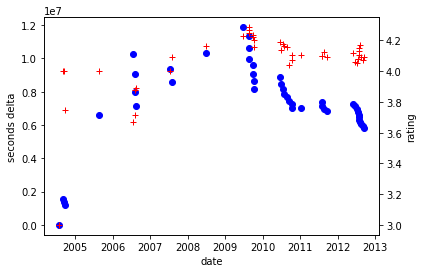

len cumsum 10 10 10


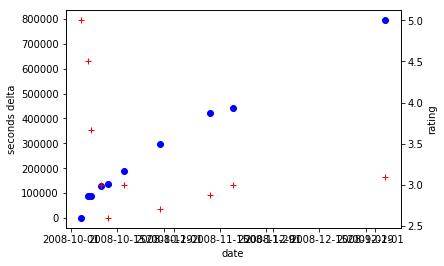

len cumsum 7 7 7


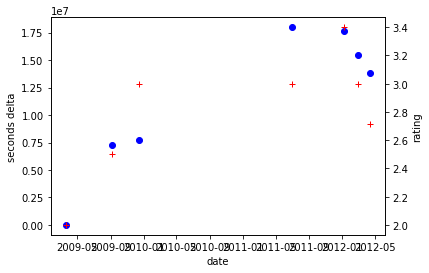

len cumsum 18 18 18


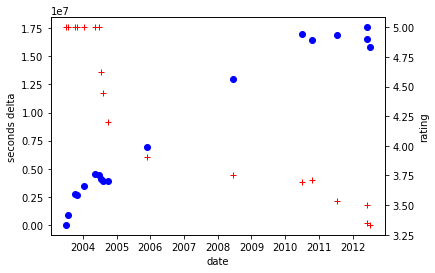

len cumsum 135 135 135


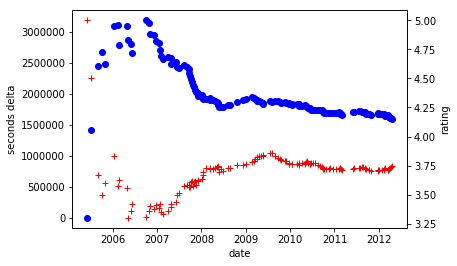

len cumsum 153 153 153


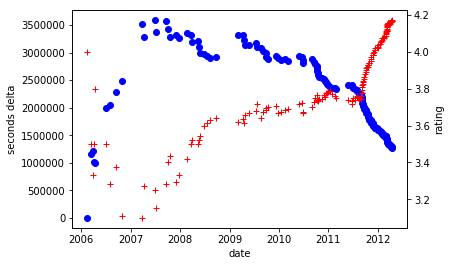

len cumsum 188 188 188


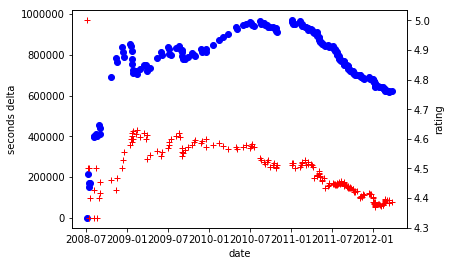

len cumsum 39 39 39


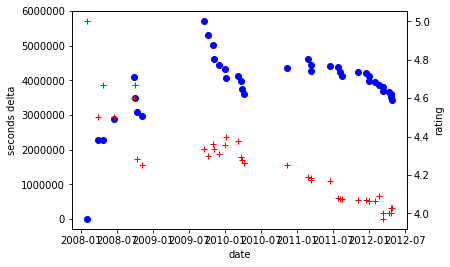

len cumsum 389 389 389


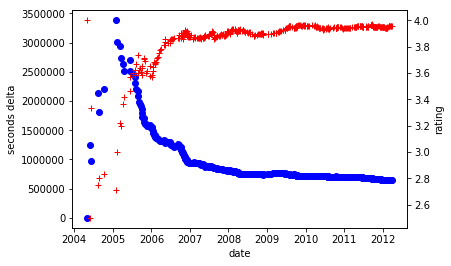

len cumsum 79 79 79


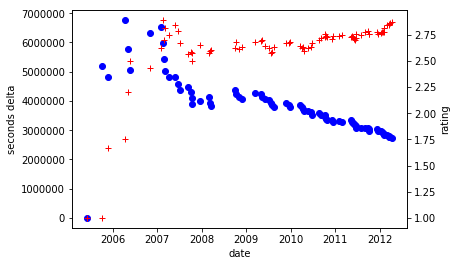

len cumsum 281 281 281


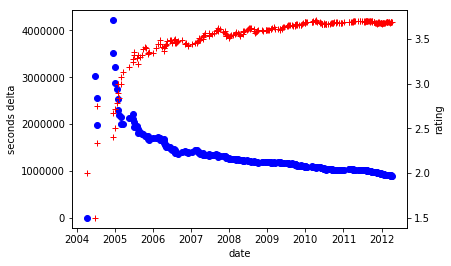

len cumsum 38 38 38


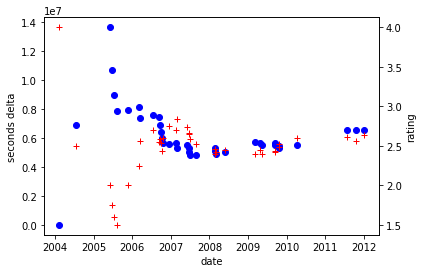

len cumsum 63 63 63


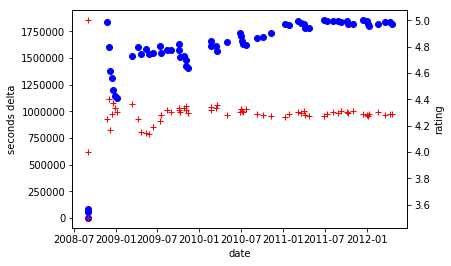

len cumsum 17 17 17


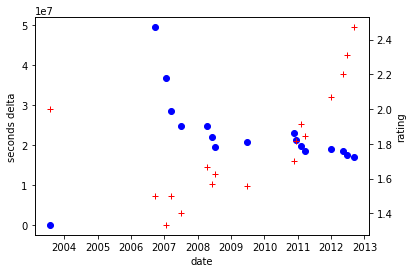

len cumsum 86 86 86


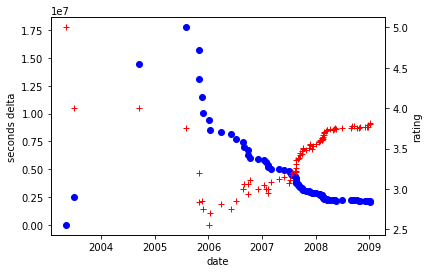

len cumsum 29 29 29


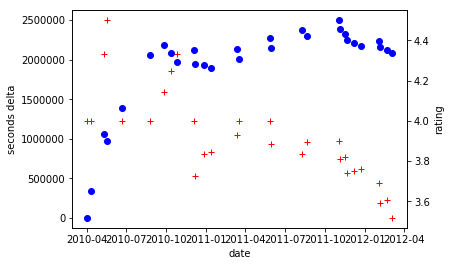

len cumsum 60 60 60


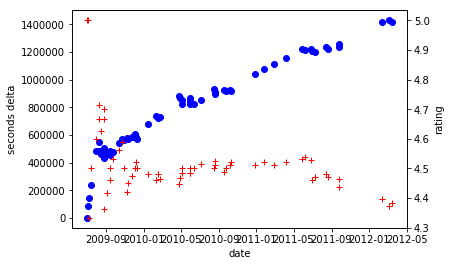

len cumsum 9 9 9


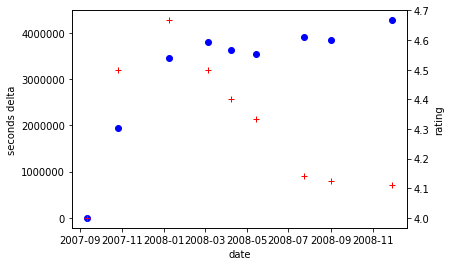

len cumsum 106 106 106


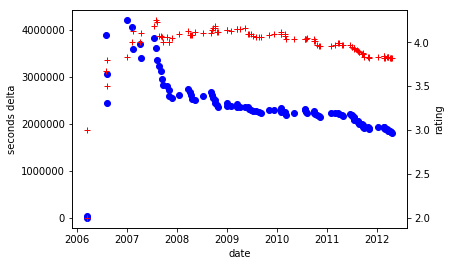

len cumsum 1 1 1


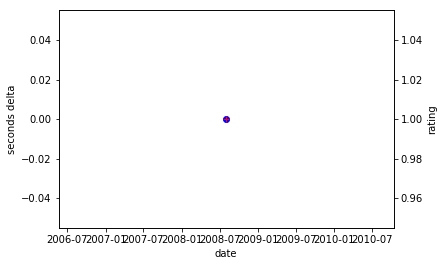

len cumsum 6 6 6


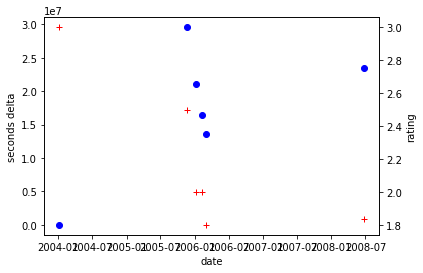

len cumsum 34 34 34


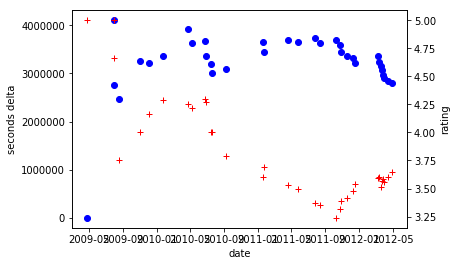

len cumsum 20 20 20


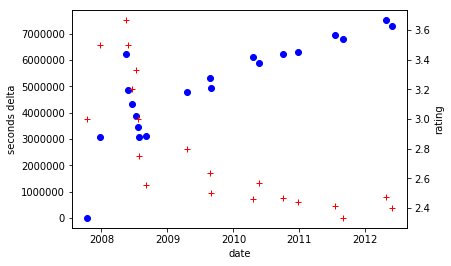

len cumsum 49 49 49


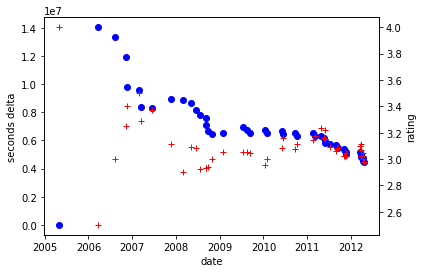

len cumsum 11 11 11


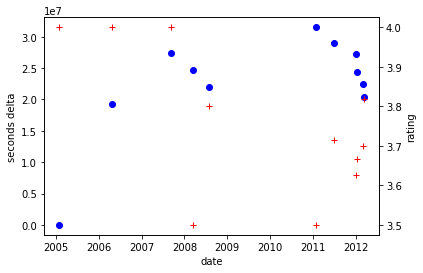

len cumsum 27 27 27


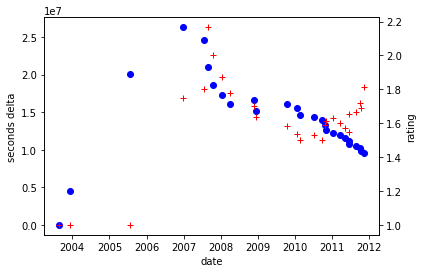

len cumsum 30 30 30


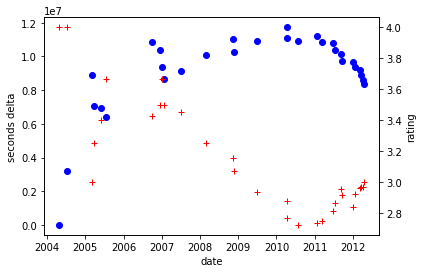

len cumsum 55 55 55


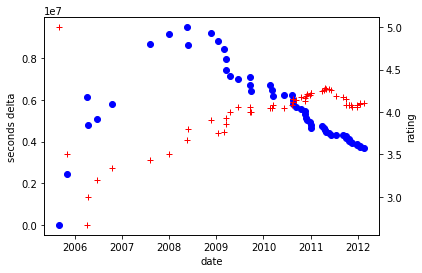

len cumsum 91 91 91


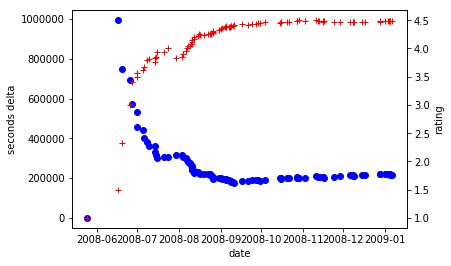

len cumsum 72 72 72


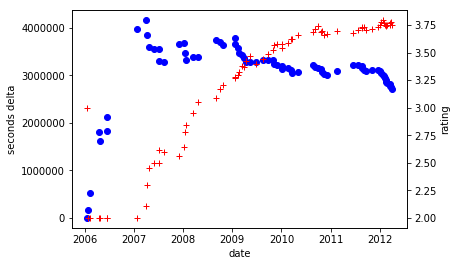

len cumsum 541 541 541


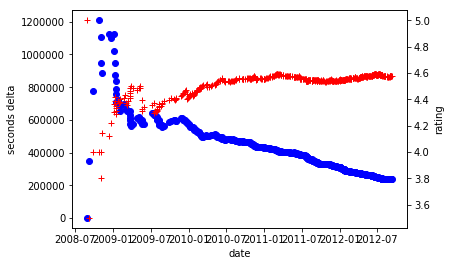

len cumsum 1 1 1


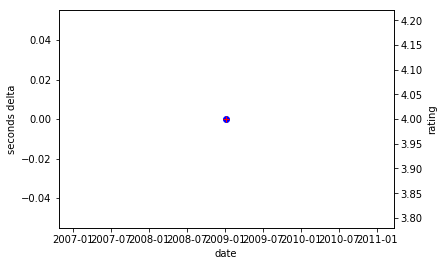

len cumsum 8 8 8


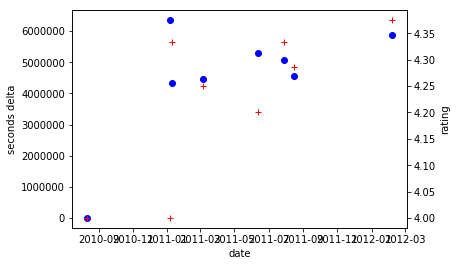

len cumsum 1 1 1


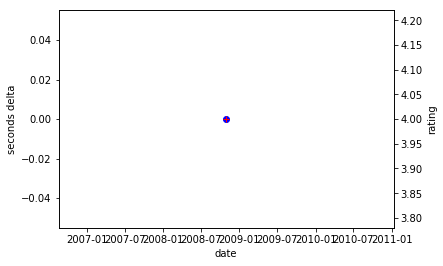

len cumsum 55 55 55


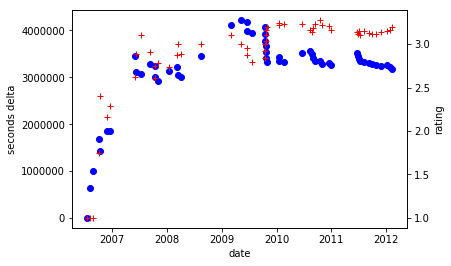

len cumsum 445 445 445


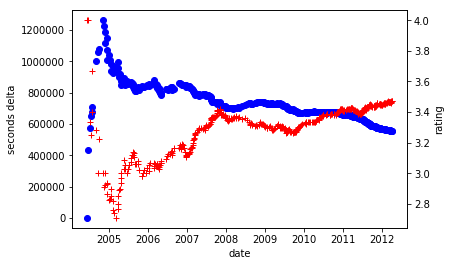

len cumsum 101 101 101


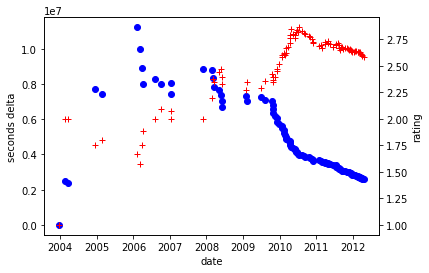

len cumsum 16 16 16


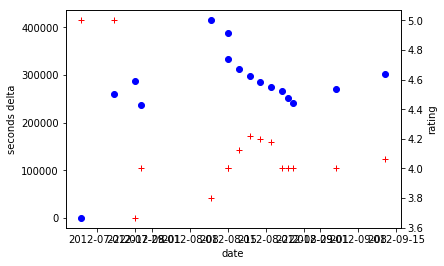

len cumsum 65 65 65


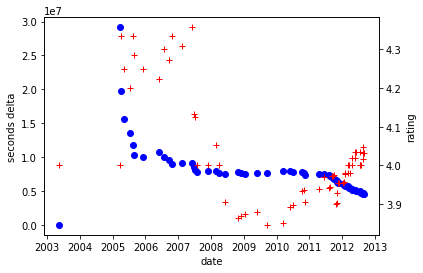

len cumsum 6 6 6


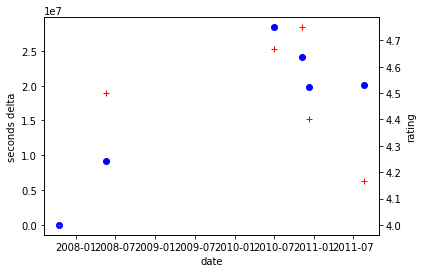

len cumsum 16 16 16


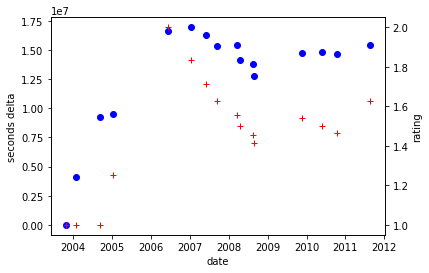

len cumsum 524 524 524


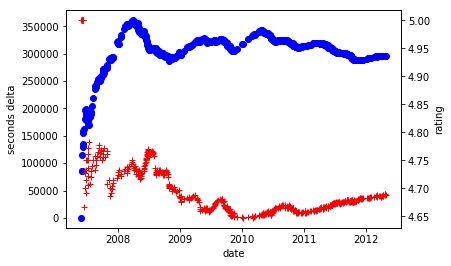

len cumsum 32 32 32


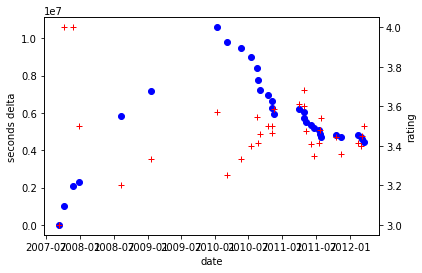

len cumsum 10 10 10


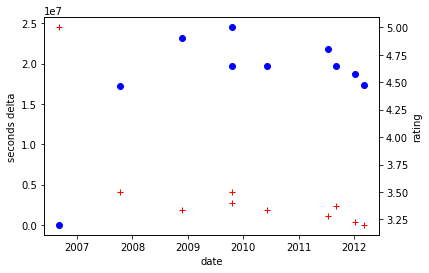

len cumsum 189 189 189


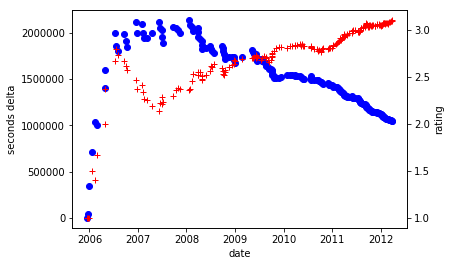

len cumsum 103 103 103


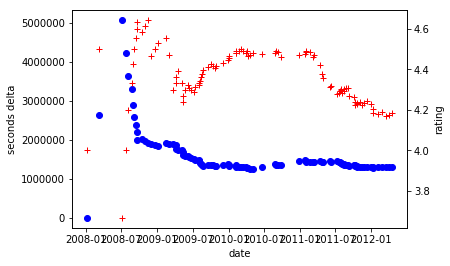

len cumsum 28 28 28


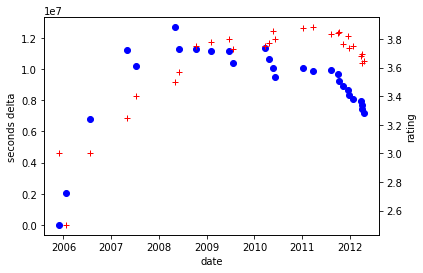

len cumsum 2 2 2


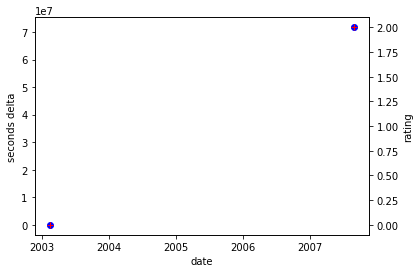

len cumsum 6 6 6


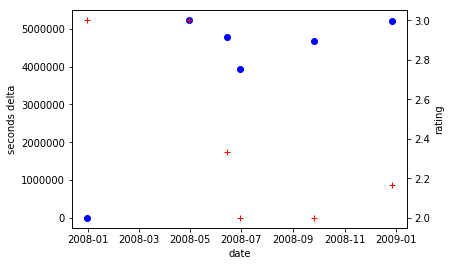

len cumsum 27 27 27


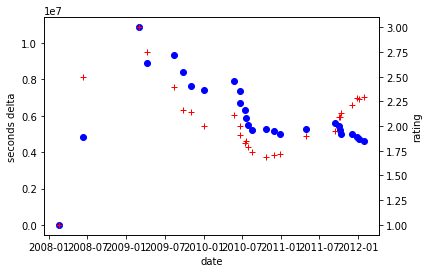

len cumsum 243 243 243


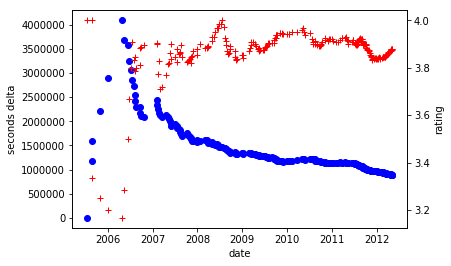

len cumsum 57 57 57


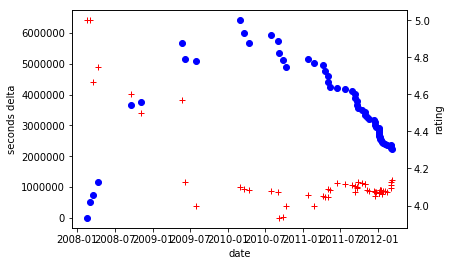

len cumsum 288 288 288


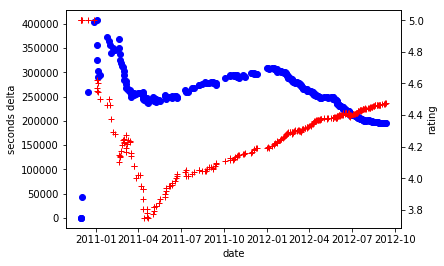

len cumsum 5 5 5


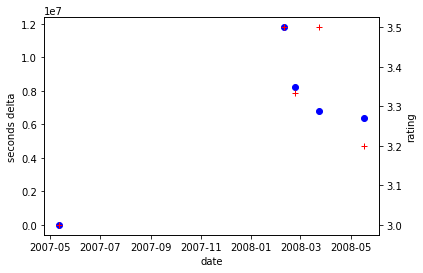

len cumsum 436 436 436


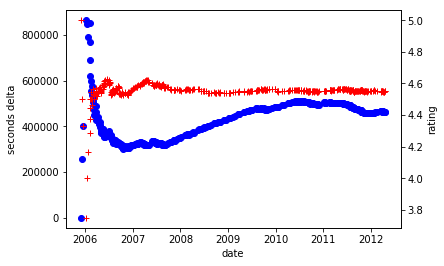

len cumsum 74 74 74


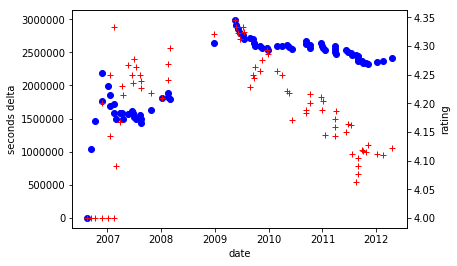

len cumsum 1 1 1


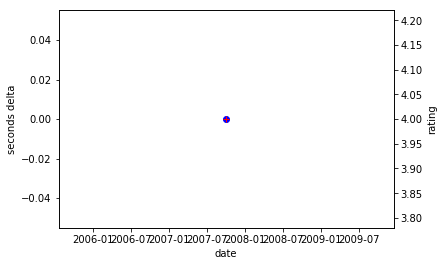

len cumsum 91 91 91


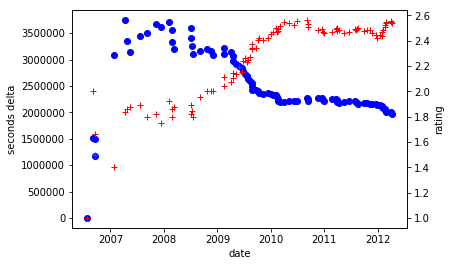

len cumsum 3 3 3


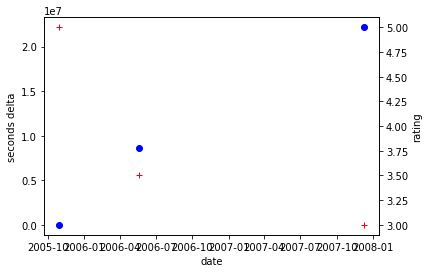

len cumsum 58 58 58


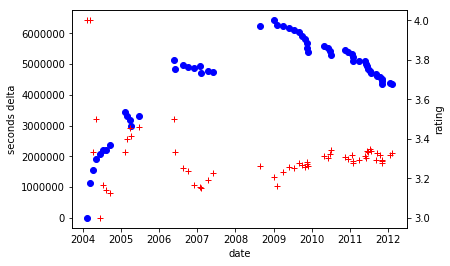

len cumsum 119 119 119


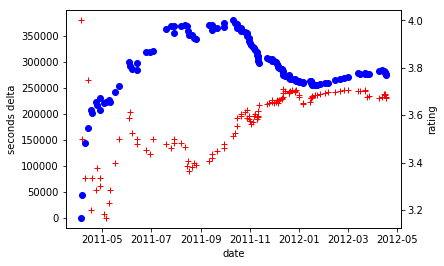

len cumsum 294 294 294


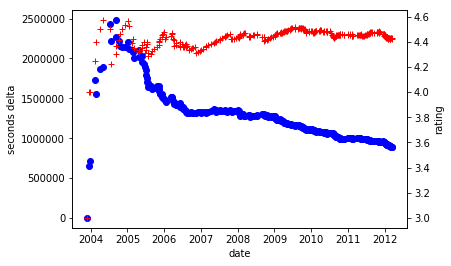

len cumsum 8 8 8


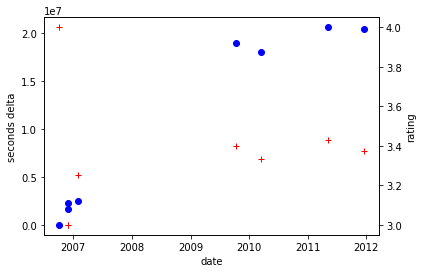

len cumsum 369 369 369


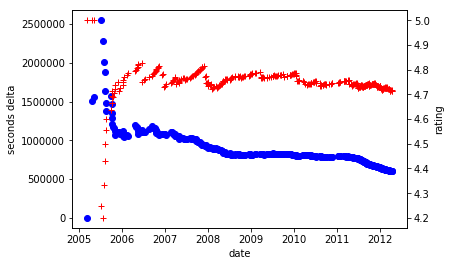

len cumsum 11 11 11


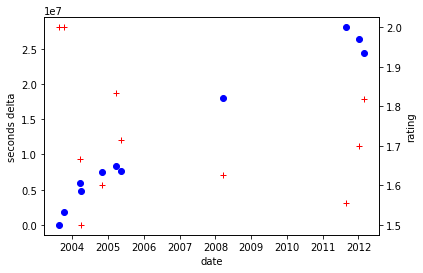

len cumsum 13 13 13


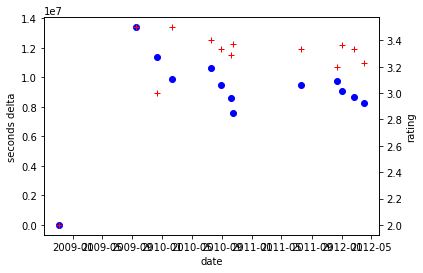

len cumsum 5 5 5


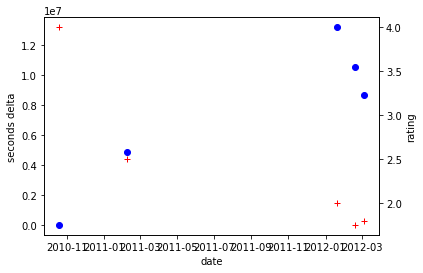

len cumsum 23 23 23


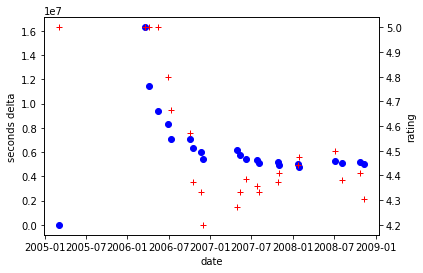

len cumsum 112 112 112


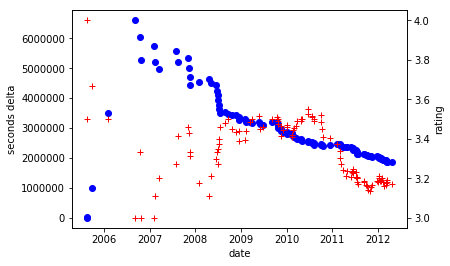

len cumsum 290 290 290


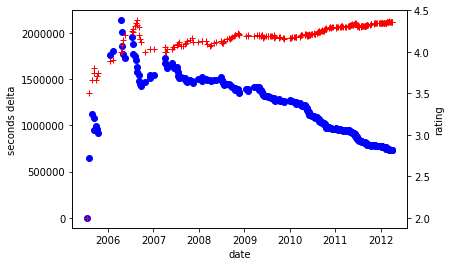

len cumsum 54 54 54


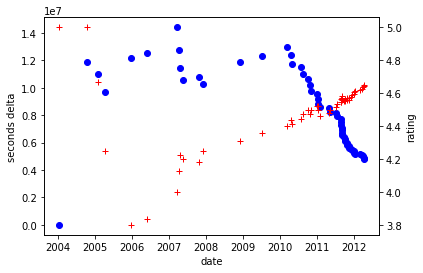

len cumsum 7 7 7


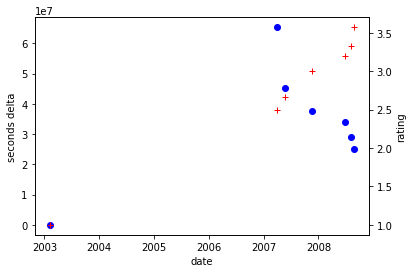

len cumsum 80 80 80


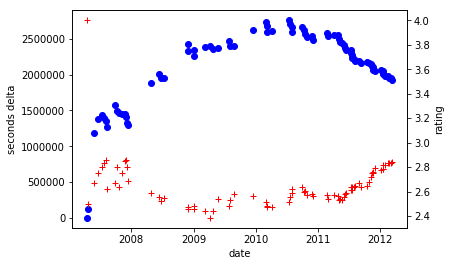

len cumsum 79 79 79


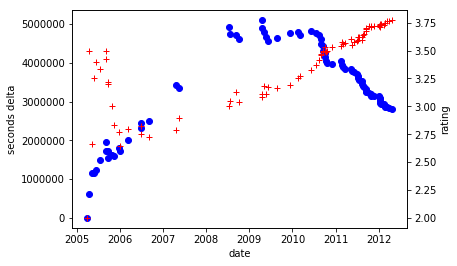

len cumsum 40 40 40


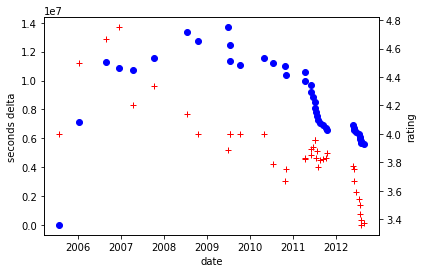

len cumsum 4 4 4


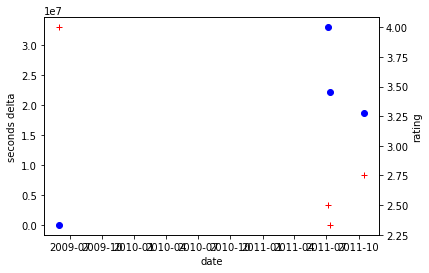

len cumsum 37 37 37


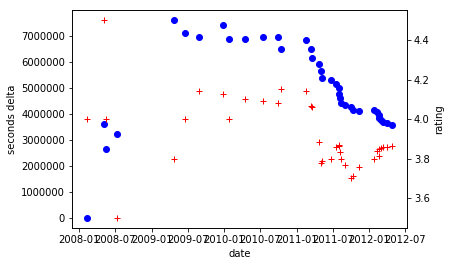

len cumsum 141 141 141


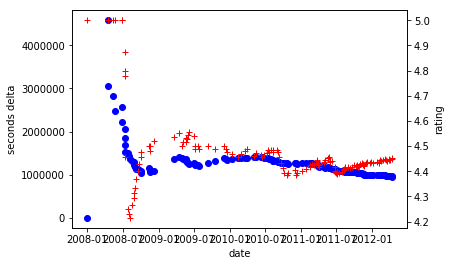

len cumsum 298 298 298


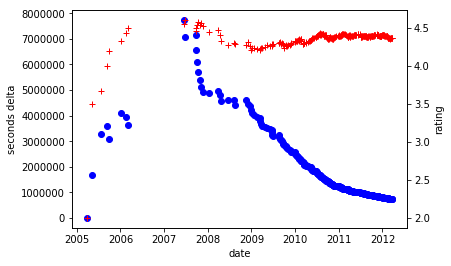

len cumsum 43 43 43


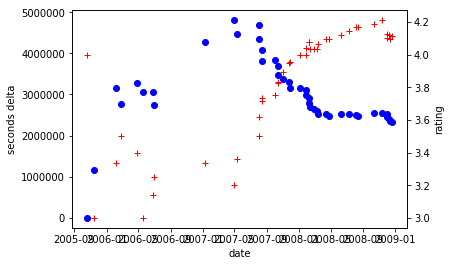

len cumsum 20 20 20


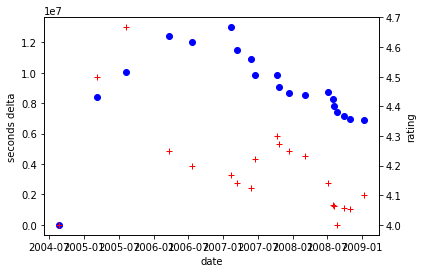

len cumsum 91 91 91


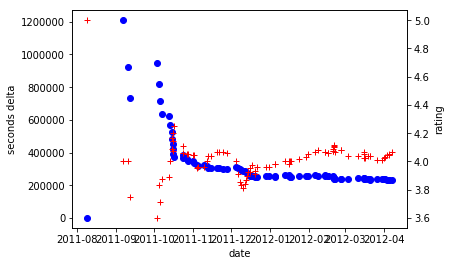

len cumsum 16 16 16


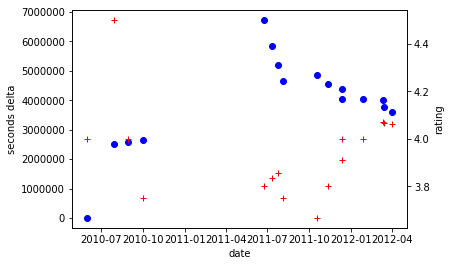

len cumsum 105 105 105


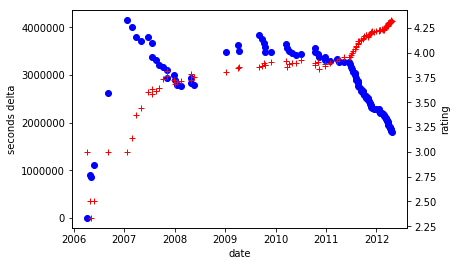

len cumsum 616 616 616


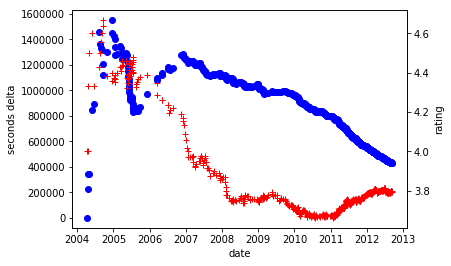

len cumsum 21 21 21


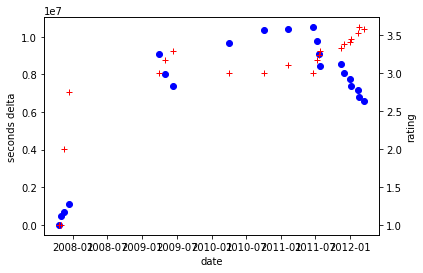

len cumsum 9 9 9


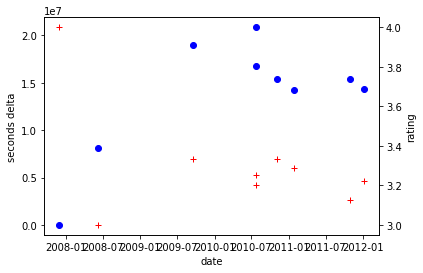

len cumsum 63 63 63


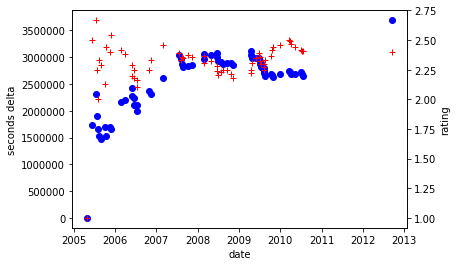

len cumsum 10 10 10


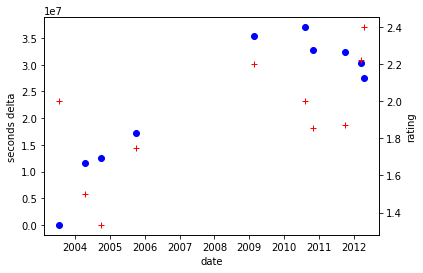

len cumsum 1 1 1


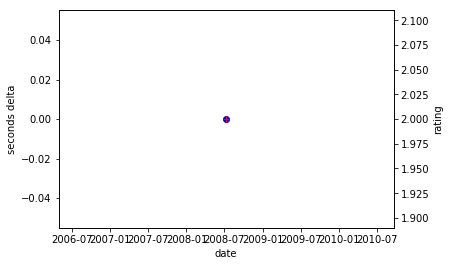

len cumsum 10 10 10


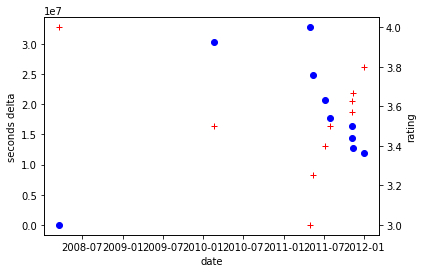

len cumsum 1 1 1


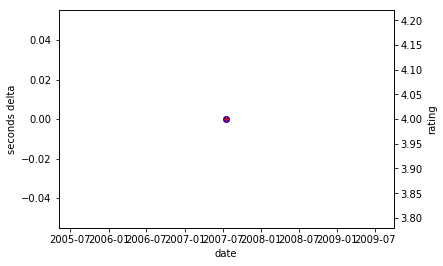

len cumsum 68 68 68


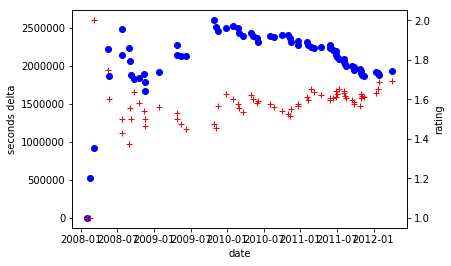

len cumsum 21 21 21


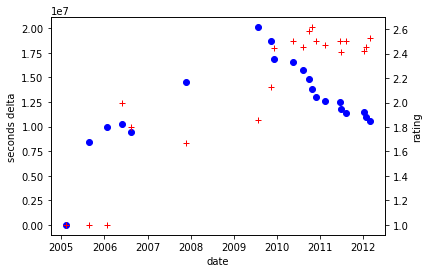

len cumsum 24 24 24


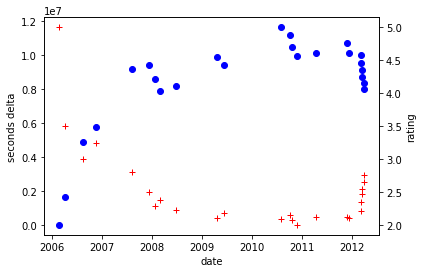

len cumsum 39 39 39


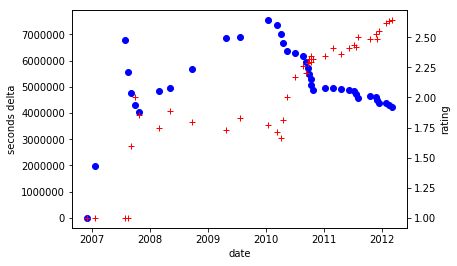

len cumsum 1 1 1


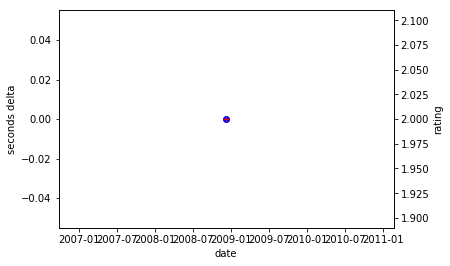

len cumsum 36 36 36


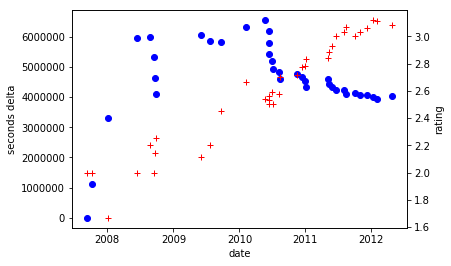

len cumsum 265 265 265


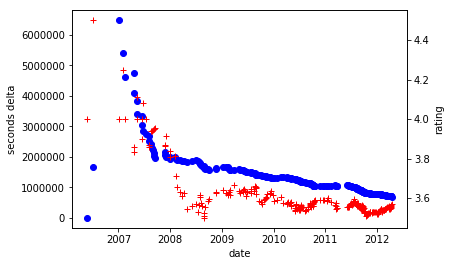

len cumsum 38 38 38


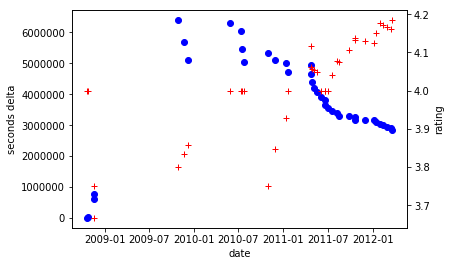

len cumsum 33 33 33


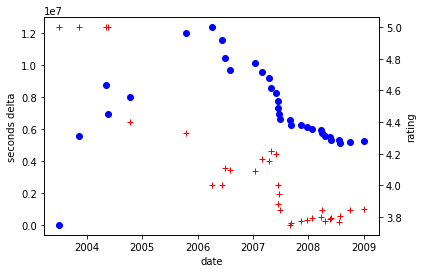

len cumsum 24 24 24


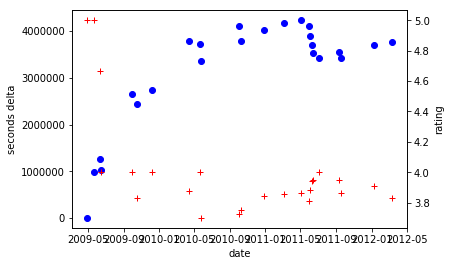

len cumsum 6 6 6


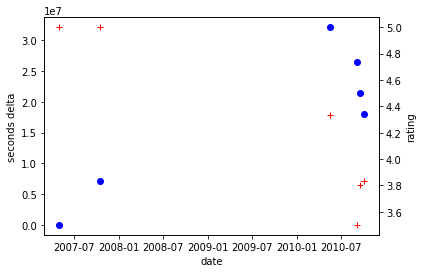

len cumsum 34 34 34


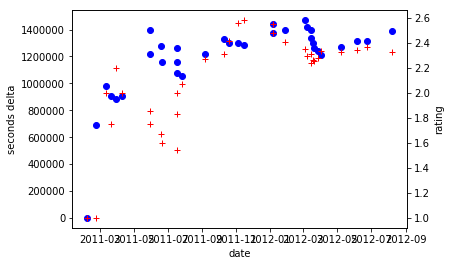

len cumsum 1 1 1


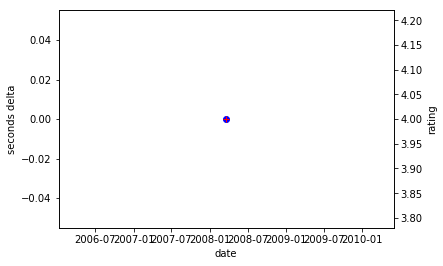

len cumsum 23 23 23


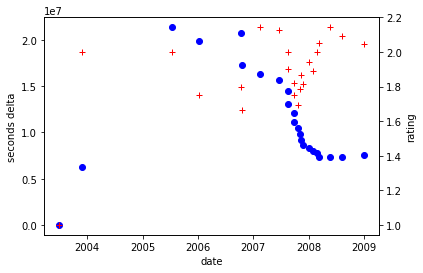

len cumsum 84 84 84


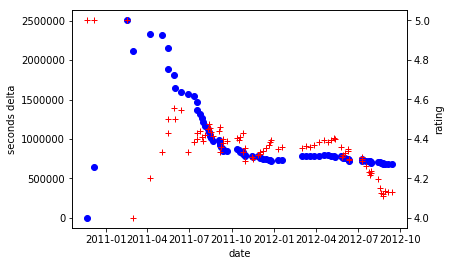

len cumsum 131 131 131


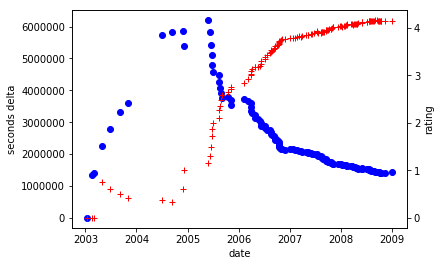

len cumsum 727 727 727


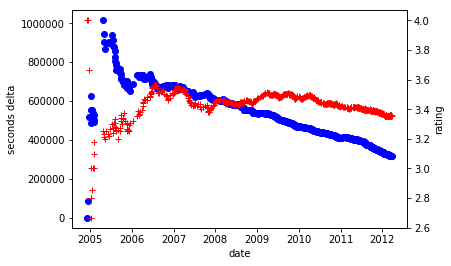

len cumsum 144 144 144


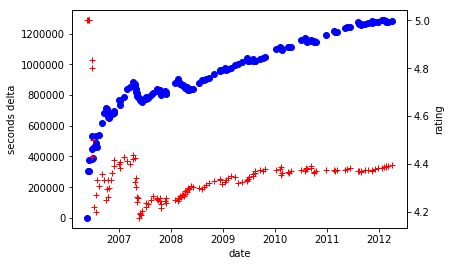

len cumsum 414 414 414


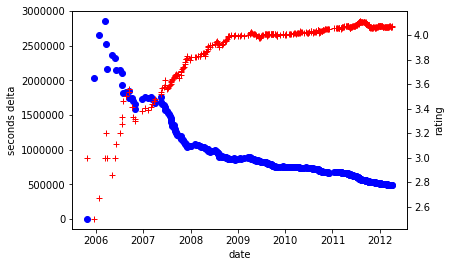

len cumsum 141 141 141


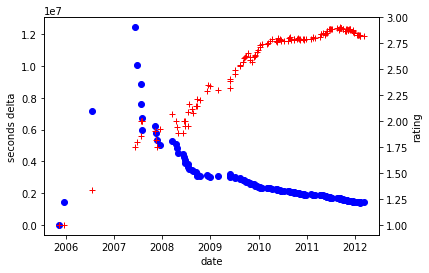

len cumsum 21 21 21


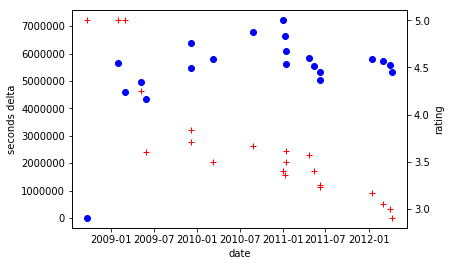

len cumsum 96 96 96


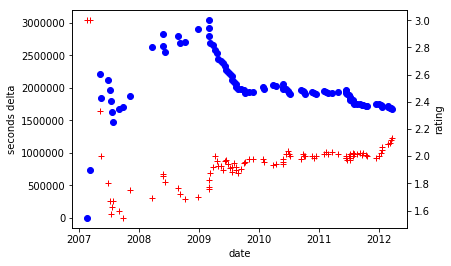

len cumsum 62 62 62


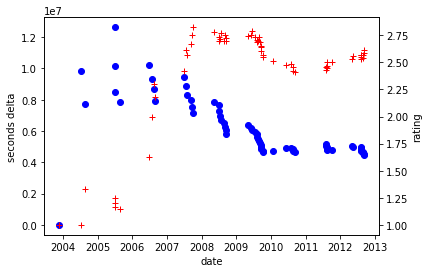

len cumsum 52 52 52


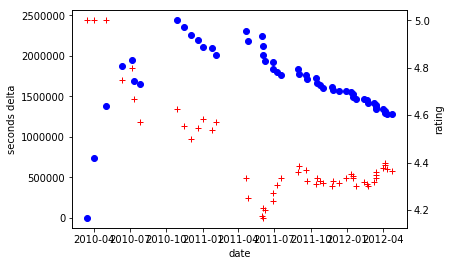

len cumsum 2 2 2


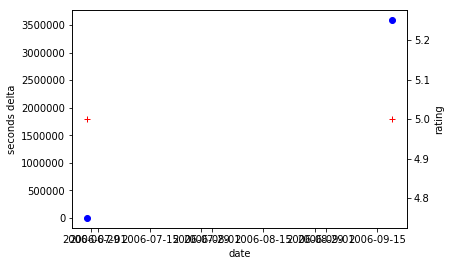

len cumsum 222 222 222


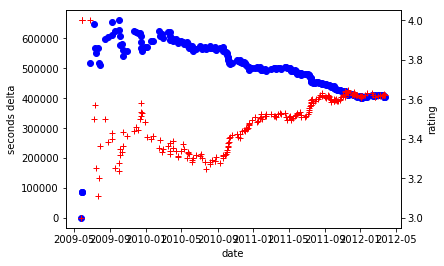

len cumsum 273 273 273


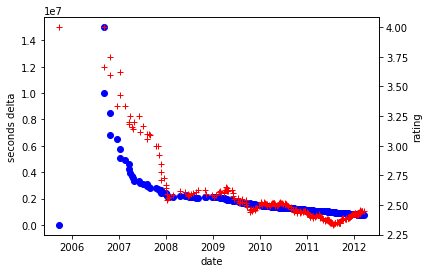

len cumsum 31 31 31


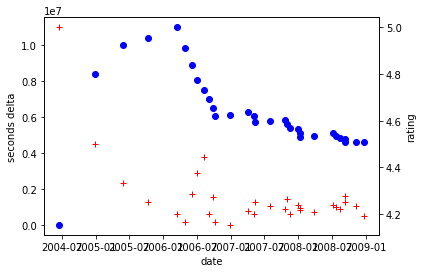

len cumsum 4 4 4


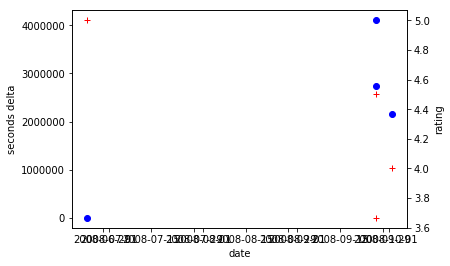

len cumsum 2220 2220 2220


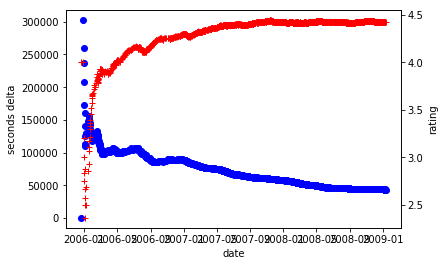

len cumsum 184 184 184


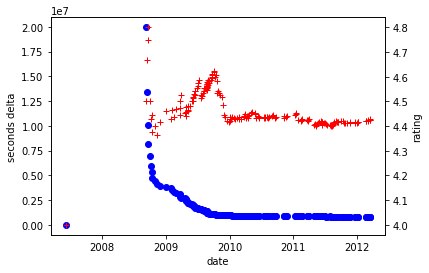

len cumsum 1 1 1


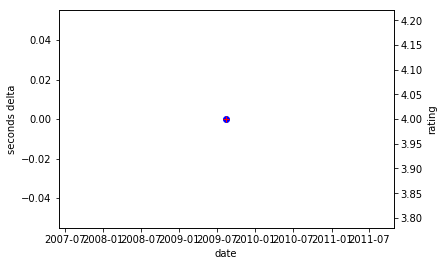

len cumsum 1 1 1


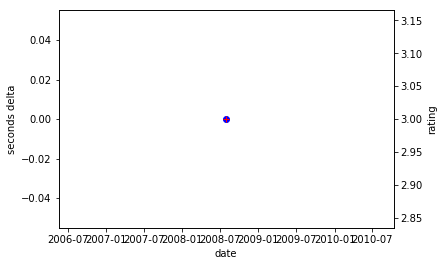

len cumsum 172 172 172


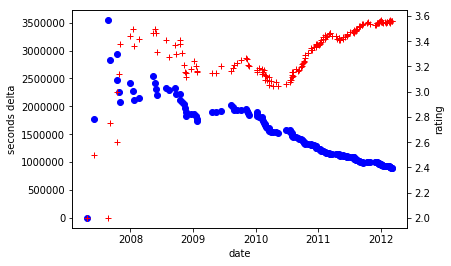

len cumsum 1 1 1


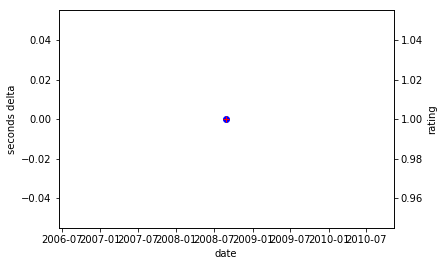

len cumsum 52 52 52


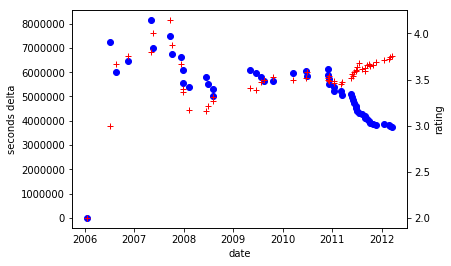

len cumsum 173 173 173


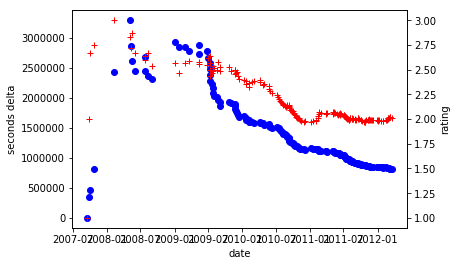

len cumsum 409 409 409


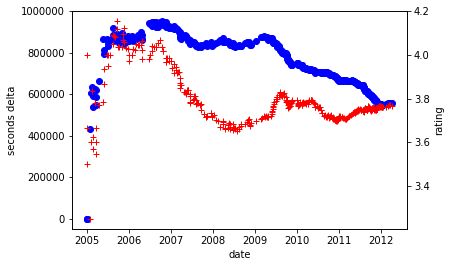

len cumsum 77 77 77


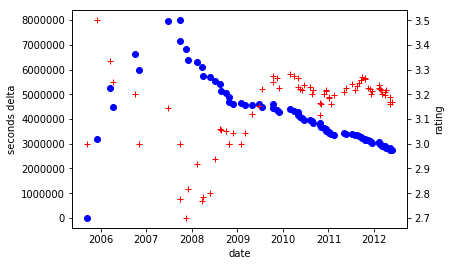

len cumsum 81 81 81


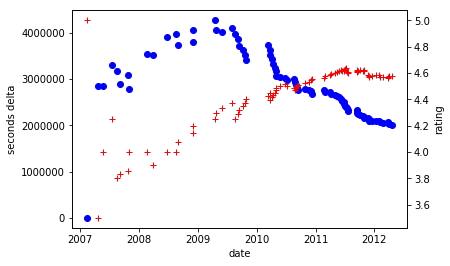

len cumsum 11 11 11


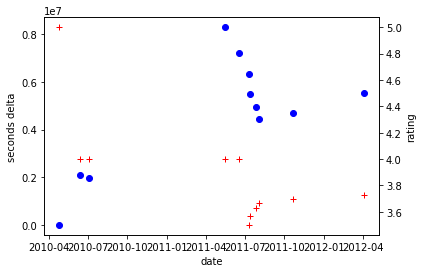

len cumsum 26 26 26


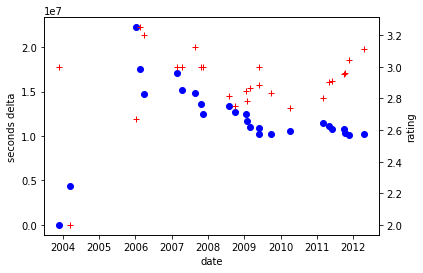

len cumsum 898 898 898


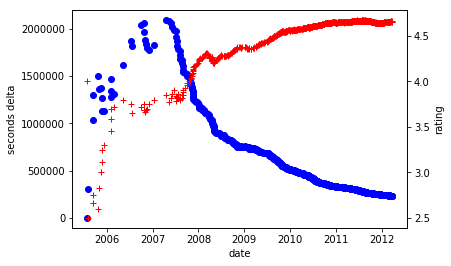

len cumsum 48 48 48


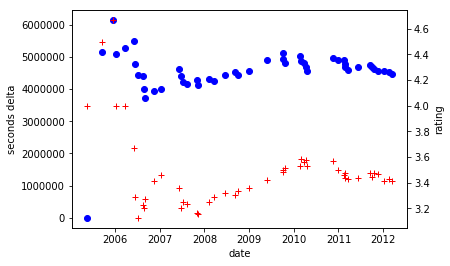

len cumsum 64 64 64


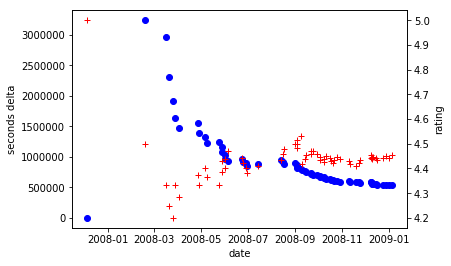

len cumsum 80 80 80


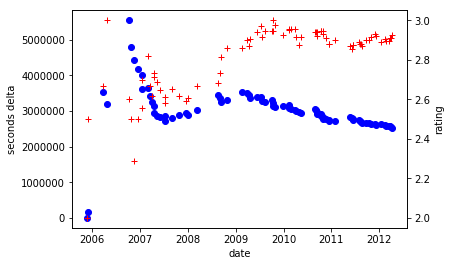

len cumsum 16 16 16


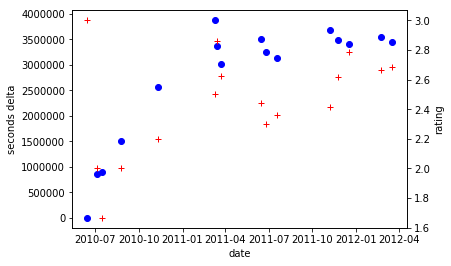

len cumsum 3 3 3


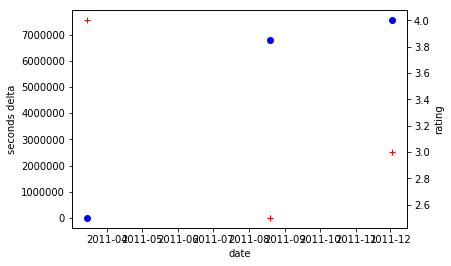

len cumsum 85 85 85


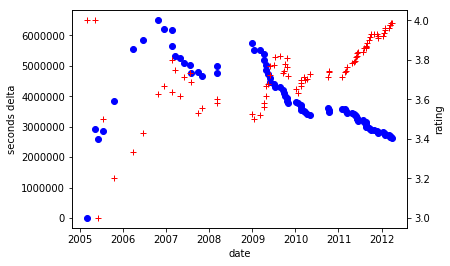

len cumsum 8 8 8


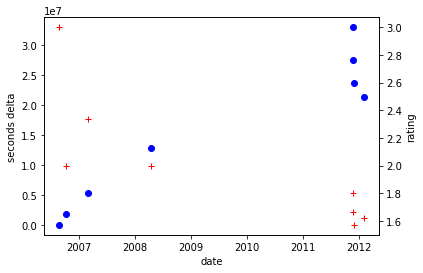

len cumsum 531 531 531


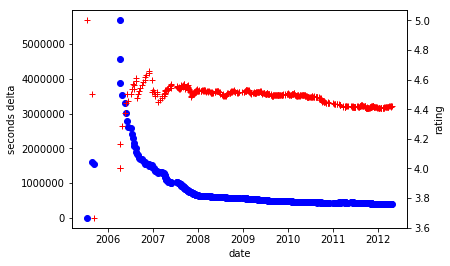

len cumsum 759 759 759


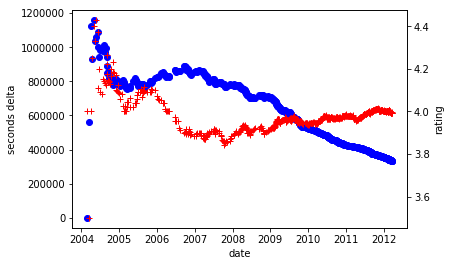

len cumsum 281 281 281


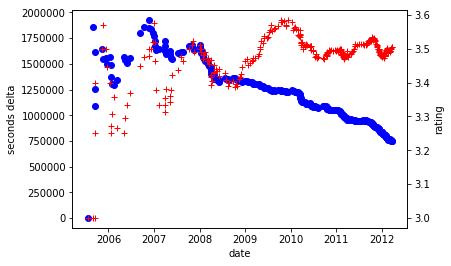

len cumsum 101 101 101


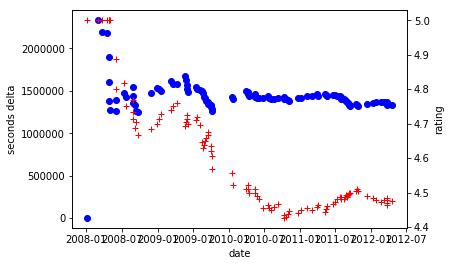

len cumsum 38 38 38


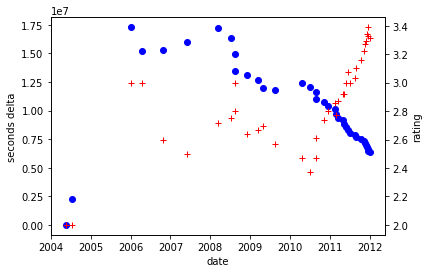

len cumsum 33 33 33


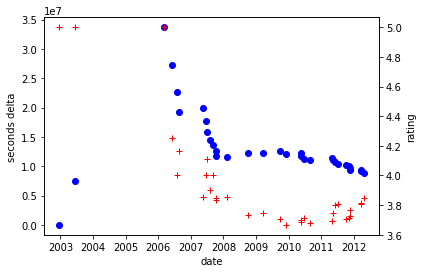

len cumsum 57 57 57


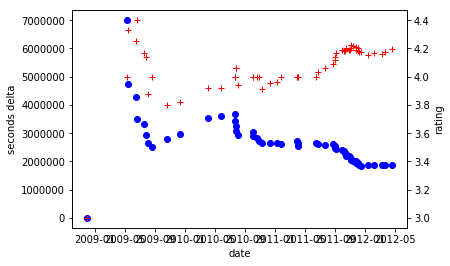

len cumsum 42 42 42


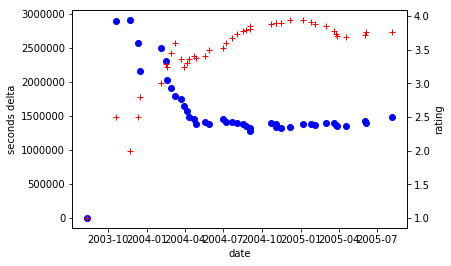

len cumsum 31 31 31


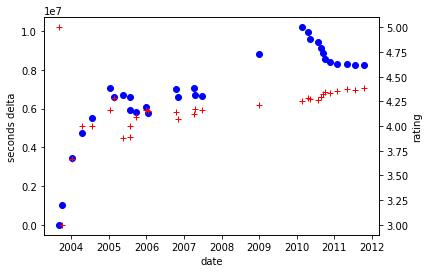

len cumsum 366 366 366


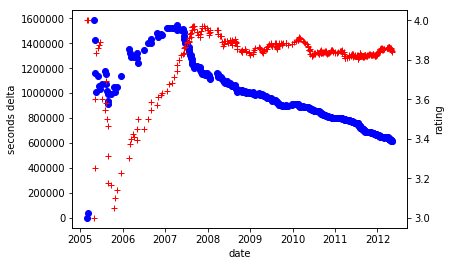

len cumsum 8 8 8


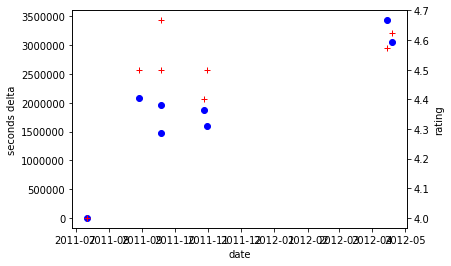

len cumsum 8 8 8


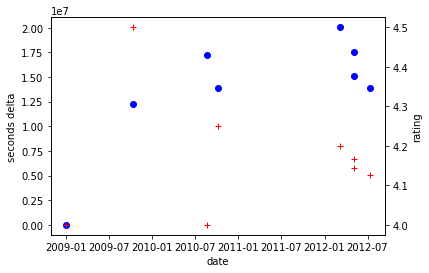

len cumsum 16 16 16


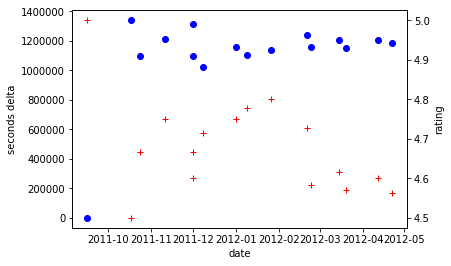

len cumsum 5 5 5


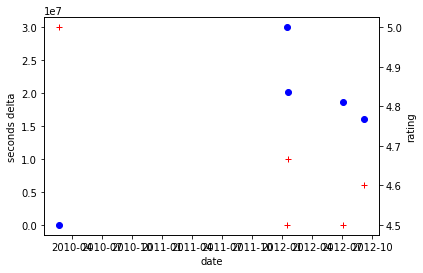

len cumsum 30 30 30


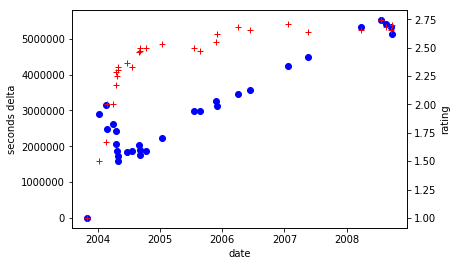

len cumsum 178 178 178


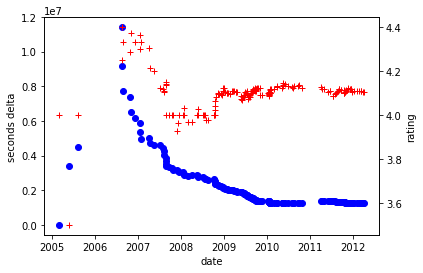

len cumsum 40 40 40


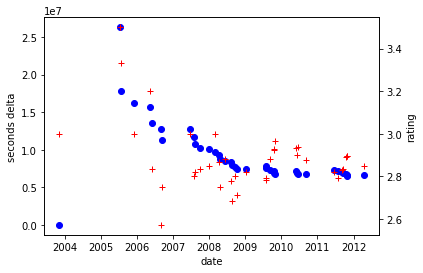

len cumsum 700 700 700


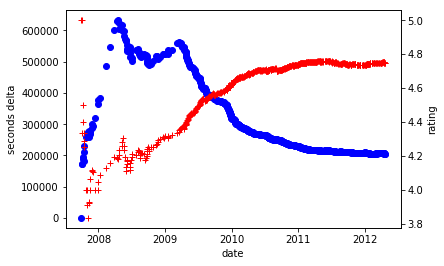

len cumsum 56 56 56


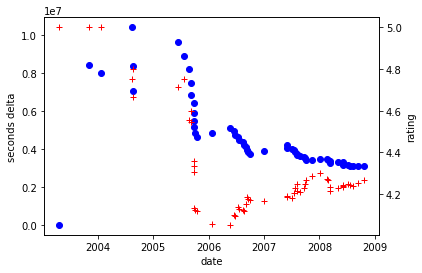

len cumsum 4 4 4


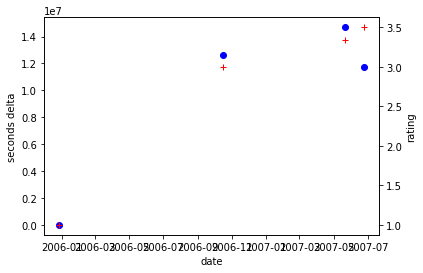

len cumsum 152 152 152


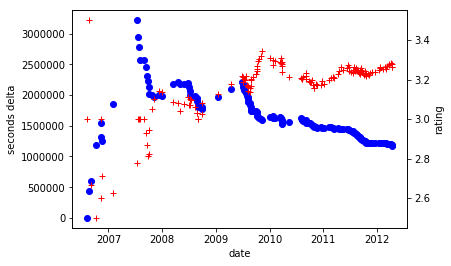

len cumsum 37 37 37


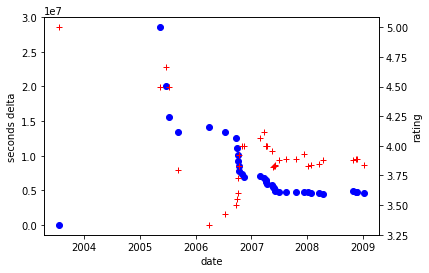

len cumsum 288 288 288


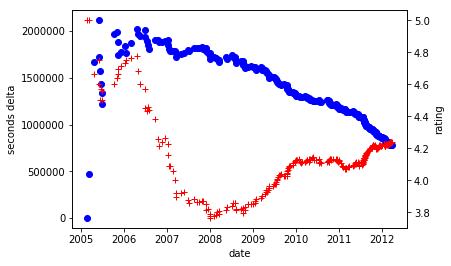

len cumsum 103 103 103


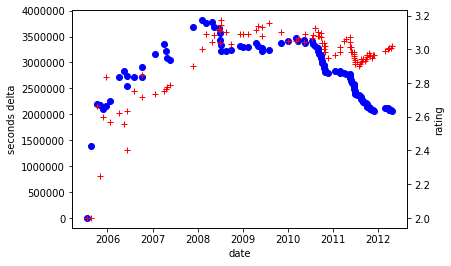

len cumsum 79 79 79


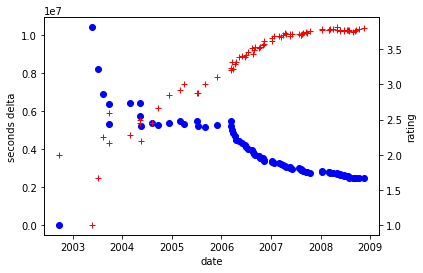

len cumsum 11 11 11


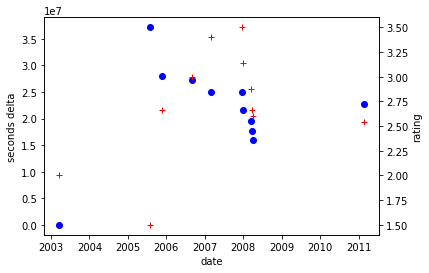

len cumsum 23 23 23


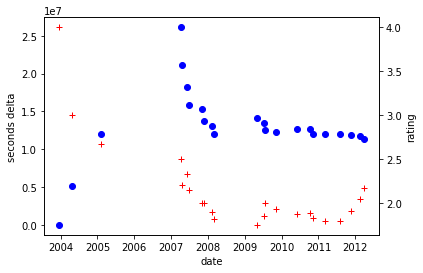

len cumsum 321 321 321


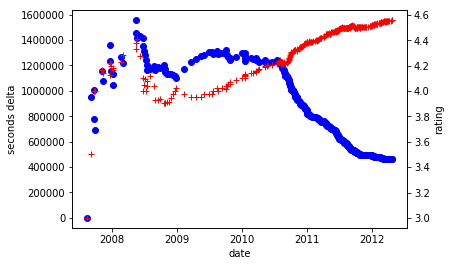

len cumsum 71 71 71


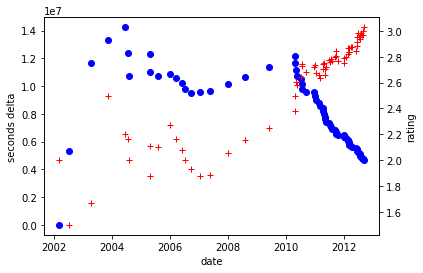

len cumsum 1 1 1


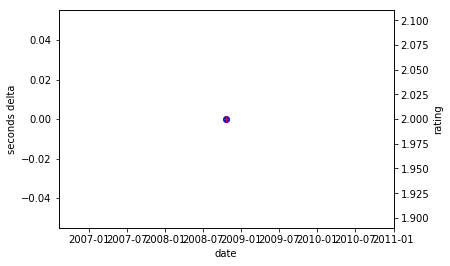

len cumsum 100 100 100


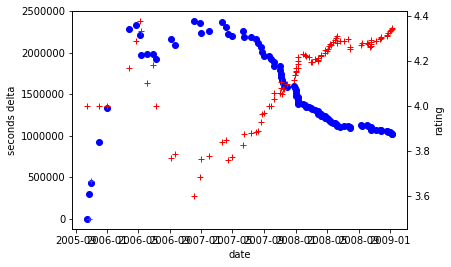

len cumsum 41 41 41


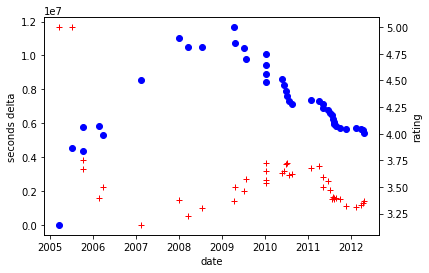

len cumsum 11 11 11


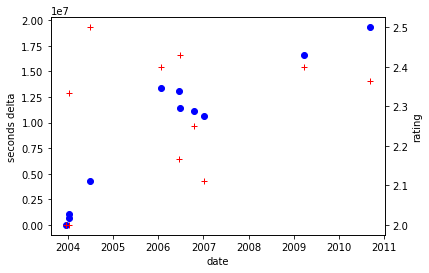

len cumsum 61 61 61


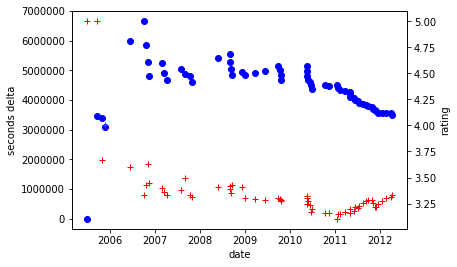

len cumsum 108 108 108


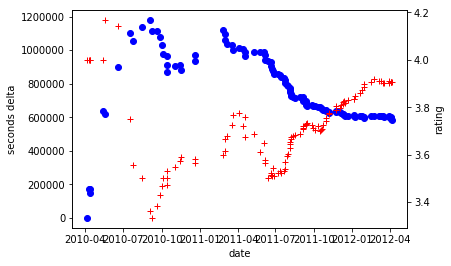

len cumsum 56 56 56


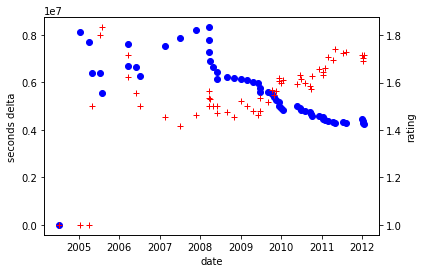

len cumsum 9 9 9


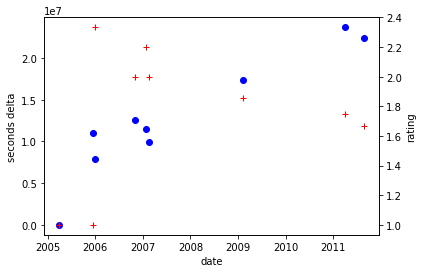

len cumsum 4 4 4


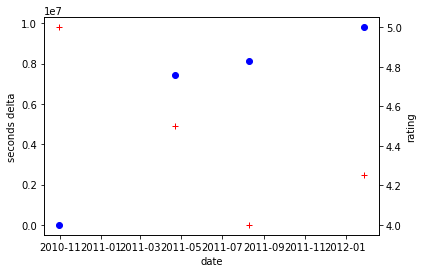

len cumsum 50 50 50


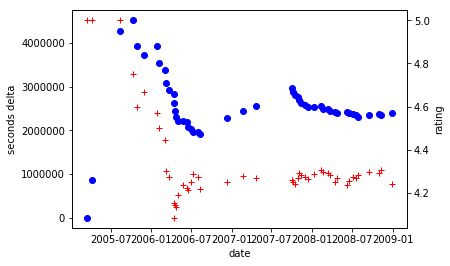

len cumsum 85 85 85


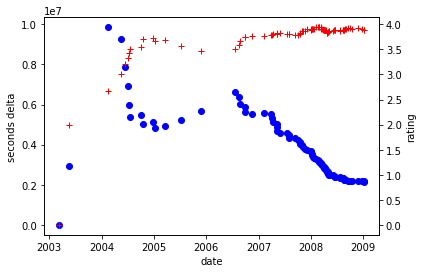

len cumsum 226 226 226


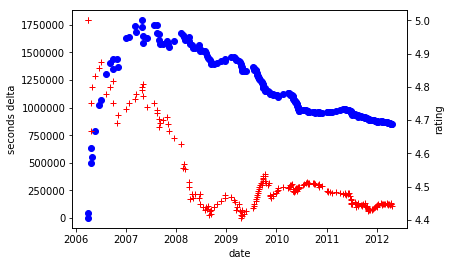

In [114]:
itemid_list = trip_data.itemid.unique().tolist()
random.shuffle(itemid_list)
for item_id in itemid_list[1000:1220]:
    fig, ax = plt.subplots()
    item_rating = sorted_trip_data[sorted_trip_data.itemid==item_id]
    item_rating_time = item_rating[['rating', 'date']]
    item_rating_time['rating'] = pd.to_numeric(item_rating_time['rating'])
    item_rating_time['date'] = pd.to_datetime(item_rating_time['date'])
    
    delta_time = item_rating_time['date']-item_rating_time['date'].shift()
#     print(len(delta_time))
    delta_time_list = delta_time.tolist()
    delta_time_list[0] = 0
    delta_time_list[1:] = [i.total_seconds() for i in delta_time_list[1:]]
    
    cumsum_deltatime = np.cumsum(delta_time_list)
    
    cummean_deltatime = []
    for i in range(len(cumsum_deltatime)):
        mean_i = cumsum_deltatime[i]/(i+1)
        cummean_deltatime.append(mean_i)
    # print("cummean", cummean)
    
    rating_list = item_rating_time['rating'].tolist()
    cumsum_rating = np.cumsum(rating_list)
    cummean_rating = []
    for i in range(len(cumsum_rating)):
        mean_i = cumsum_rating[i]/(i+1)
        cummean_rating.append(mean_i)
  
    list_of_datetimes = item_rating_time['date']
    dates = matplotlib.dates.date2num(list_of_datetimes)
    
    print("len cumsum", len(cummean_deltatime), len(delta_time_list), len(dates))
    
    ax.plot_date(dates, cummean_deltatime, color="blue")
    ax.set_xlabel("date")
    ax.set_ylabel("seconds delta")
    
    ax2 = ax.twinx()
    ax2.plot_date(dates, cummean_rating, color="red", marker="+")
    ax2.set_ylabel("rating")
    plt.show()

In [90]:
item_rating_time['date'].iloc[0]

Timestamp('2002-11-03 00:00:00')

In [95]:
item_rating_time['date']-item_rating_time['date'].shift()

4911        NaT
4910   193 days
4909   114 days
4908   296 days
4907   331 days
4906    29 days
4905   122 days
4904   108 days
4903   201 days
4902    20 days
4901     3 days
4900   302 days
4899    48 days
4898     7 days
4897    11 days
4896     1 days
4895   276 days
4894     9 days
4893    20 days
4892    24 days
4891    37 days
4890     4 days
4889     3 days
4888     5 days
4887    16 days
4886   209 days
4885    76 days
4884    51 days
4883   343 days
4882     2 days
4881    16 days
4880    59 days
4879   149 days
4878     2 days
4877    35 days
4876    16 days
4875    41 days
4874    11 days
4873    12 days
4872    13 days
4871     4 days
4869    10 days
4870     0 days
4868     8 days
4867    46 days
4866    51 days
4865     9 days
4864     5 days
Name: date, dtype: timedelta64[ns]

### visualizing the rating trend in data

len cumsum 79 79


/zf15/rc7ne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/zf15/rc7ne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


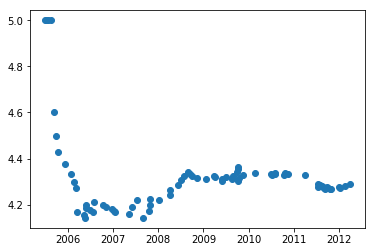

len cumsum 284 284


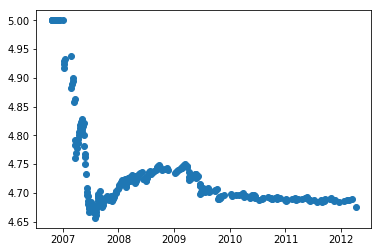

len cumsum 58 58


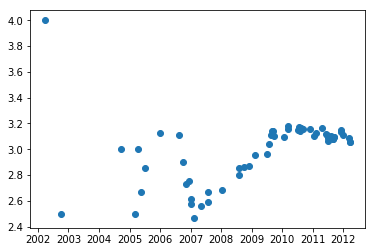

len cumsum 21 21


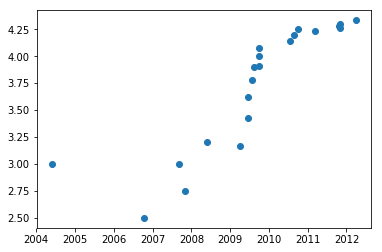

len cumsum 355 355


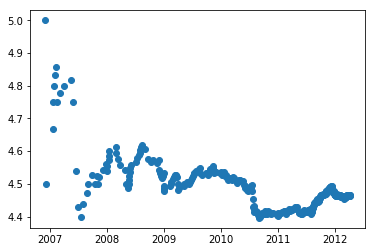

len cumsum 40 40


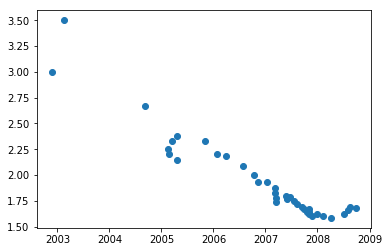

len cumsum 37 37


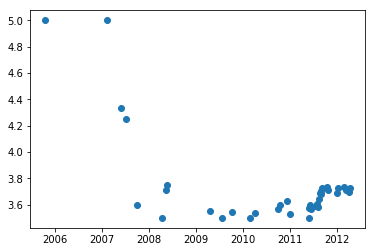

len cumsum 391 391


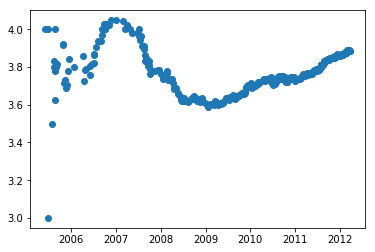

len cumsum 130 130


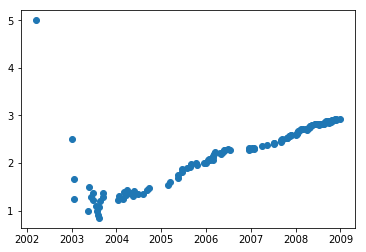

len cumsum 48 48


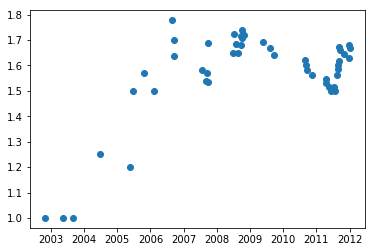

In [81]:
itemid_list = trip_data.itemid.unique().tolist()
for item_id in itemid_list[30:40]:
    item_rating = sorted_trip_data[sorted_trip_data.itemid==item_id]
    item_rating_time = item_rating[['rating', 'date']]
    item_rating_time['rating'] = pd.to_numeric(item_rating_time['rating'])
    item_rating_time['date'] = pd.to_datetime(item_rating_time['date'])

    cumsum = np.cumsum(item_rating_time['rating'].tolist())
    print("len cumsum", len(cumsum), len(item_rating_time['rating']))
    cummean = []
    for i in range(len(cumsum)):
        mean_i = cumsum[i]/(i+1)
        cummean.append(mean_i)
    # print("cummean", cummean)
    list_of_datetimes = item_rating_time['date']
    dates = matplotlib.dates.date2num(list_of_datetimes)

    plt.plot_date(dates, cummean)
    plt.show()

In [50]:
item_rating_time[item_rating_time['date'] < '2011-03-27']['rating'].mean()

1.2941176470588236

In [52]:
item_rating_time[item_rating_time['date'] >= '2011-03-27']['rating'].mean()

3.625

In [56]:
len(item_rating_time), item_rating_time

(192,         rating       date
 352407     3.0 2007-04-26
 352406     1.0 2007-06-25
 352405     1.0 2007-07-16
 352404     1.0 2007-09-06
 352403     4.0 2007-11-06
 352402     1.0 2008-01-01
 352401     1.0 2008-01-02
 352400     1.0 2008-01-02
 352399     1.0 2008-02-26
 352398     5.0 2008-03-23
 352397     4.0 2008-03-28
 352396     5.0 2008-04-12
 352395     3.0 2008-05-07
 352394     4.0 2008-06-15
 352393     3.0 2008-06-16
 352392     5.0 2008-06-23
 352391     1.0 2008-07-08
 352390     1.0 2008-08-06
 352389     1.0 2008-08-11
 352388     4.0 2008-08-15
 352387     5.0 2008-08-22
 352386     4.0 2008-08-28
 352385     5.0 2008-08-30
 352384     4.0 2008-08-31
 352383     5.0 2008-09-16
 352382     1.0 2008-10-05
 352381     4.0 2008-10-18
 352380     2.0 2008-10-20
 352379     5.0 2009-04-28
 352378     4.0 2009-05-21
 ...        ...        ...
 352245     4.0 2012-05-25
 352244     5.0 2012-05-29
 352243     5.0 2012-06-03
 352242     5.0 2012-06-06
 352241     4.0 2012-06

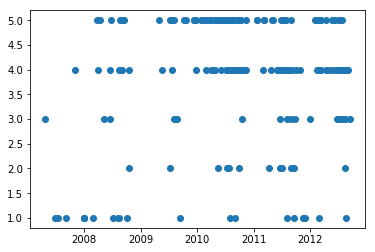

In [62]:
list_of_datetimes = item_rating_time['date']
values = item_rating_time['rating']
dates = matplotlib.dates.date2num(list_of_datetimes)
plt.plot_date(dates, values)

len cumsum 192 192


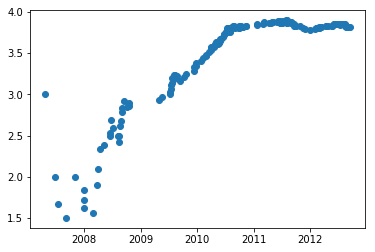

In [71]:
cumsum = np.cumsum(item_rating_time['rating'].tolist())
print("len cumsum", len(cumsum), len(item_rating_time['rating']))
cummean = []
for i in range(len(cumsum)):
    mean_i = cumsum[i]/(i+1)
    cummean.append(mean_i)
# print("cummean", cummean)
plt.plot_date(dates, cummean)

In [ ]:
plt.plot()

In [11]:
itemid_list = trip_data.itemid.unique().tolist()
mean_rating_list = []
for itemid in itemid_list:
    rating_list = trip_data[trip_data.itemid == itemid].rating.tolist()
    rating_array = np.array([float(i) for i in rating_list])
#     print("rating num", len(rating_list), np.mean(rating_array))
    mean_rating = np.mean(rating_array)
    mean_rating_list.append(mean_rating)

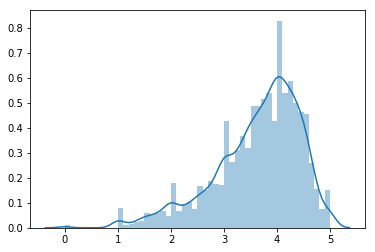

In [12]:
sns.distplot(mean_rating_list)